# Week 12, Part 1

### Topic
 1. Motivation: Questions from the Beers vs. BAC single linear regregression
 1. MLR beginnings - Snow-Depth dataset
    * NOTE: the library 'effects' has issues running in the jupyter notebook -- **IN DEV**
 1. BACK TO SLIDES TO DISCUSS CONDTIONS TO USE MLR
 1. Outliers and outlier removal with the Snow-Depth dataset
 1. Addressing collinearity
 1. BACK TO SLIDES TO DISCUSS COLLINEARITY & MODEL SELECTION
 1. Bonus: Class exercise with Snow-Depth data




In [1]:
# resize
require(repr)
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=300)

Loading required package: repr



## 1. Motivation: Questions from the Beers vs. BAC single linear regregression

Let's recall our Beers-vs-BAC dataset from last week:

In [2]:
#BB = read.csv("http://www.math.montana.edu/courses/s217/documents/beersbac.csv")
# or
BB = read.csv("../week10/beersbac.csv")

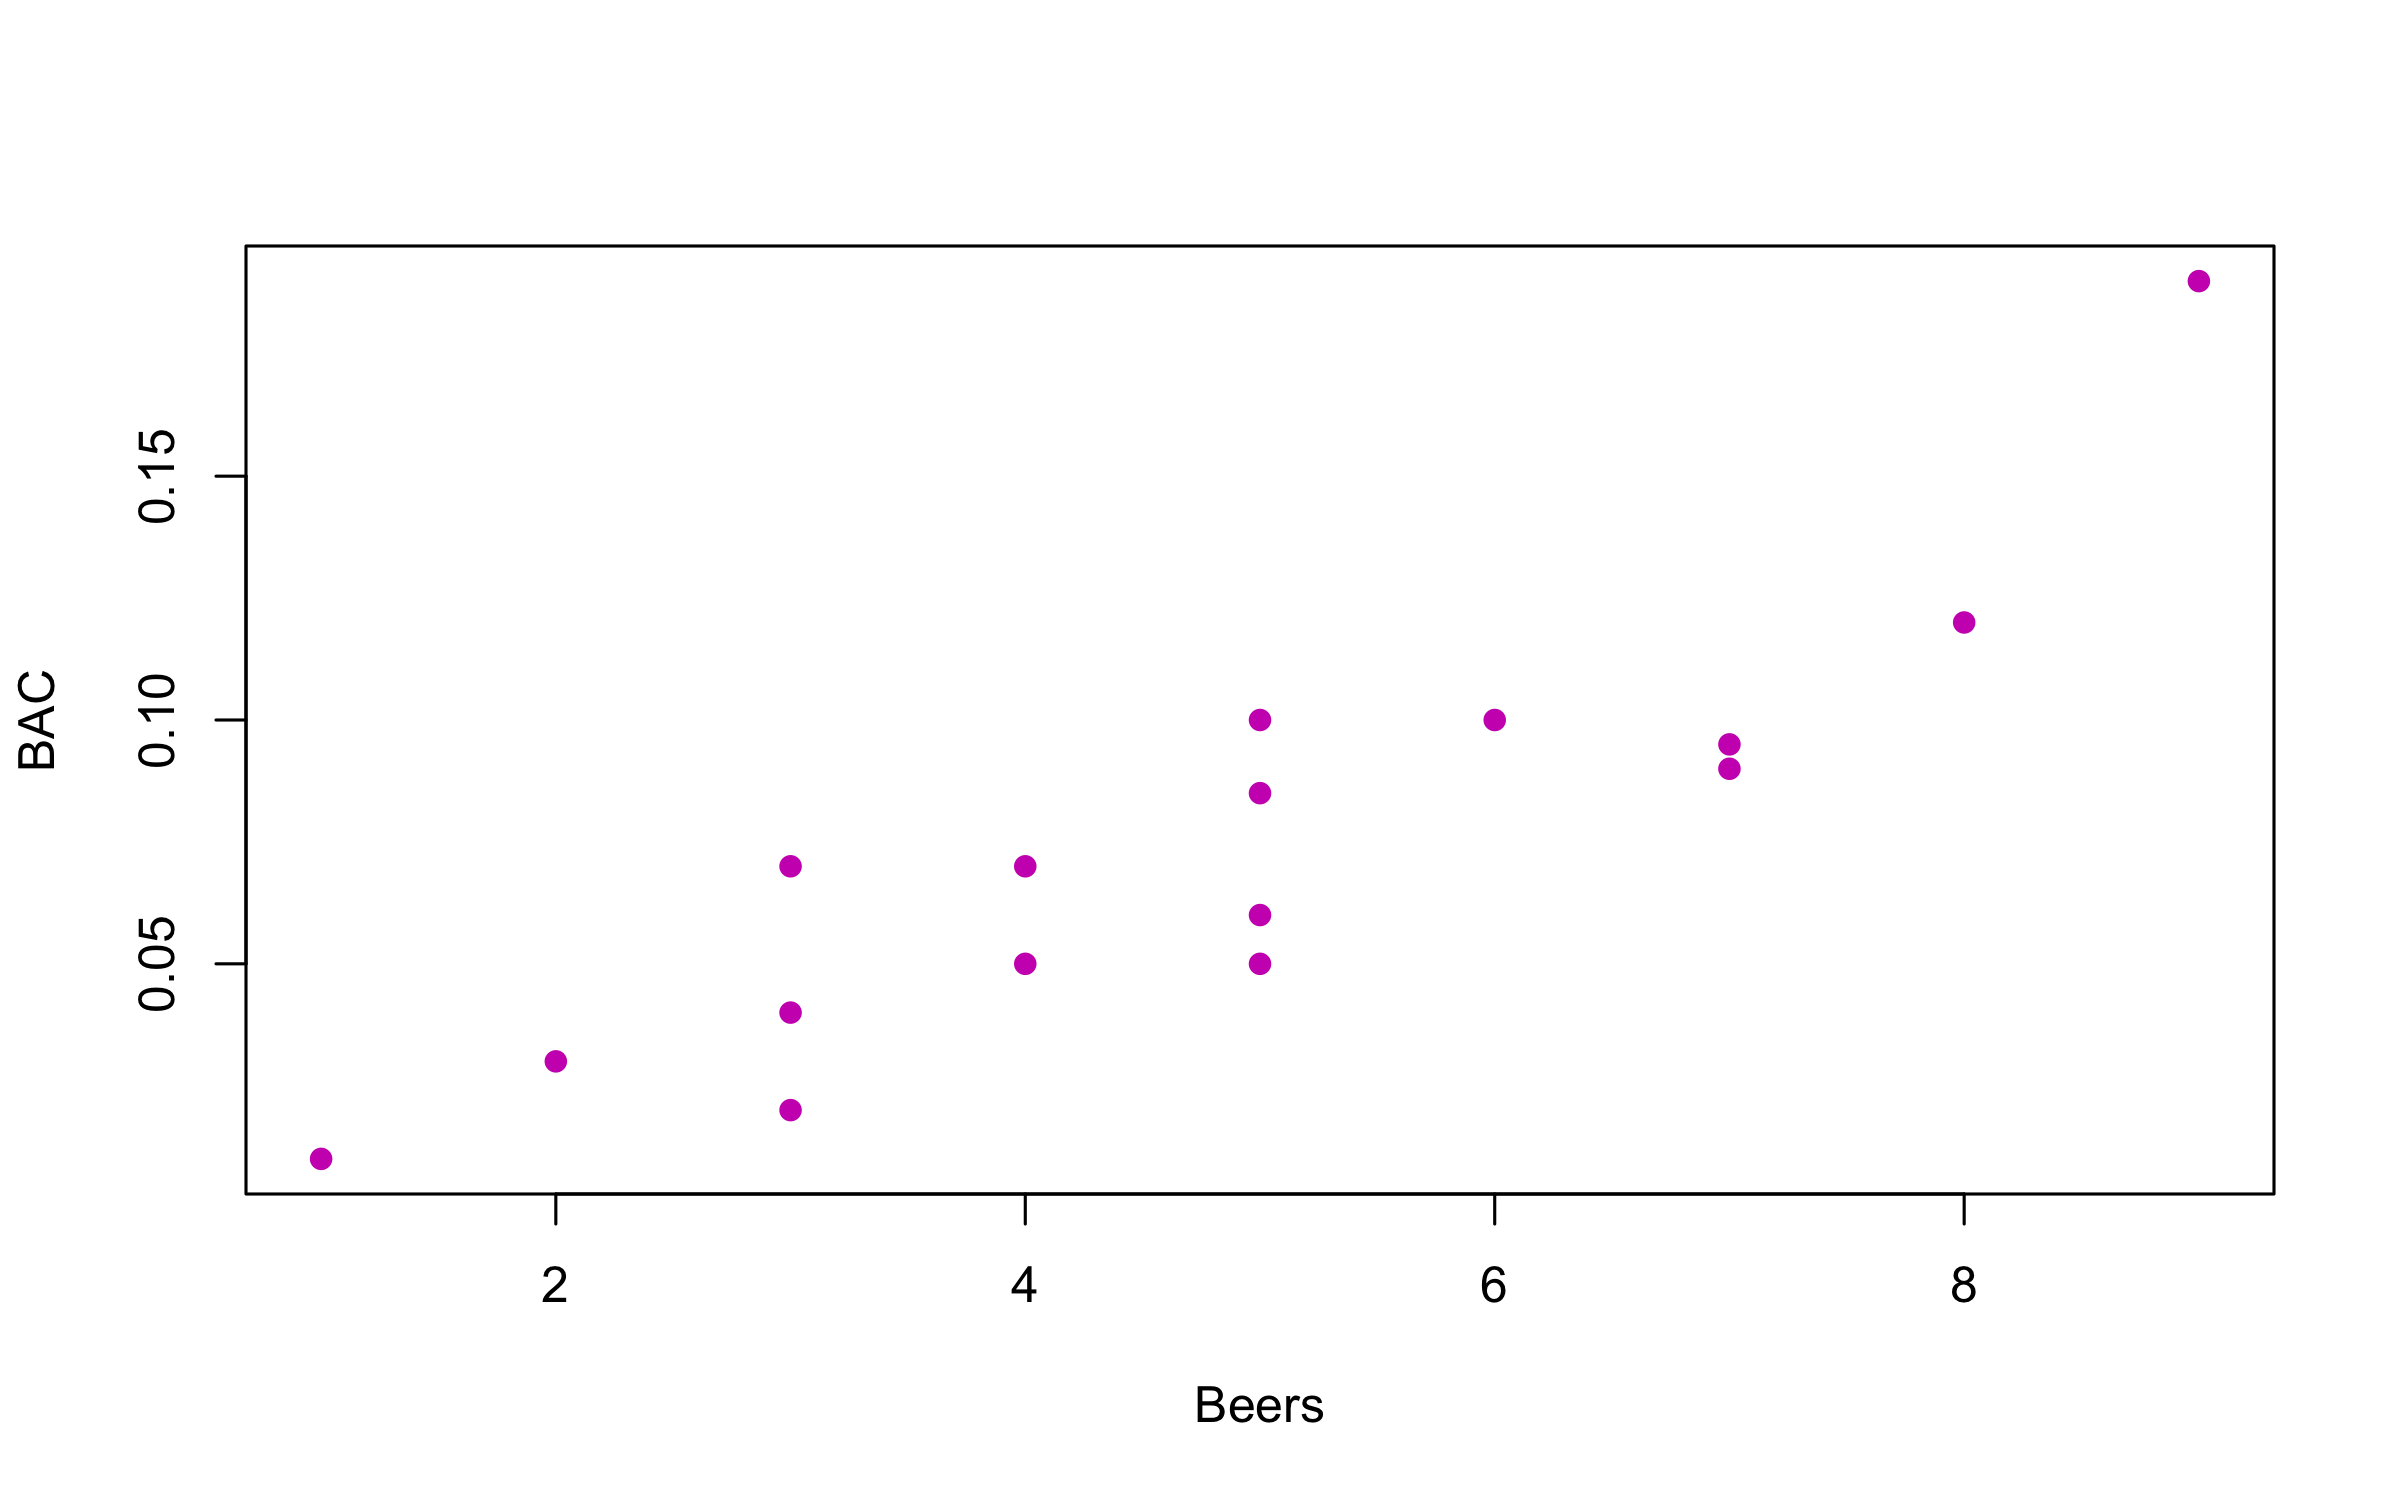

In [3]:
plot(BAC~Beers, data=BB, pch=16, col=30)

It might be useful to know the sex or weight or age of the subjects in the Beers vs BAC study to account for more of the variation in the responses then maybe we can say more with this dataset $\rightarrow$ i.e. what is the predicted BAC for a woman of a certain age?

So, let's make our models a little more complicated and see what fun things we can learn with a more complex model!

## 2. MLR beginnings  - Snow-Depth dataset

We can think of a suite of characteristics of observations that might be related to a single response variable, let's test this out with the Snow-depth dataset.

First, install useful packages:

In [4]:
#install.packages("psych") # run once

In [5]:
require(psych)

Loading required package: psych



We'll start with an example of snow depths at some high elevation locations on a *single* day in April. A random sample of n = 25 MT (montana) locations  were obtained from the [Natural Resources Conversation Service’s website](http://www.wcc.nrcs.usda.gov/snotel/Montana/montana.html) a few years ago. 

Information on the snow depth (`Snow.Depth`) in inches, daily Minimum and Maximum Temperatures (`Min.Temp` and `Max.Temp`) in F and elevation of the site (`Elevation`) in feet. A snow science researcher (or spring back-country skier) might be interested in understanding Snow depth as a function of Minimum Temperature, Maximum Temperature, and Elevation. One might assume that colder and higher places will have more snow, but using just one of the predictor variables might leave out some important predictive information.

So lets read in this dataset and take a look:

In [6]:
#snotel_s = read.csv("http://www.math.montana.edu/courses/s217/documents/snotel_s.csv")
# or
snotel_s = read.csv("snotel_s.csv")

In [7]:
head(snotel_s)

ID Station        Snow.Depth Max.Temp Min.Temp Elevation
1 33 Daly Creek     20.2       38       31       5780     
2 63 Wood Creek     29.2       39       31       5960     
3 27 Hand Creek      1.7       50       33       5035     
4 83 Copper Bottom   1.3       42       33       5200     
5 60 Albro Lake     59.7       30       24       8300     
6 62 Black Pine     41.5       31       27       7210

We're going to use the `psych` library to do a nice "pairs-panels" plot, but it will look better if we reorganize the data a bit:

In [8]:
snotel2 = snotel_s[,c(1:2,4:6,3)] #Reorders columns for nicer pairs.panel display

In [9]:
head(snotel2)

ID Station        Max.Temp Min.Temp Elevation Snow.Depth
1 33 Daly Creek     38       31       5780      20.2      
2 63 Wood Creek     39       31       5960      29.2      
3 27 Hand Creek     50       33       5035       1.7      
4 83 Copper Bottom  42       33       5200       1.3      
5 60 Albro Lake     30       24       8300      59.7      
6 62 Black Pine     31       27       7210      41.5

For our `pairs.panels` plot, we won't use the `ID` or `Station` because these by themselves are not explanitory variables for the `Snow.Depth` at a particular region:

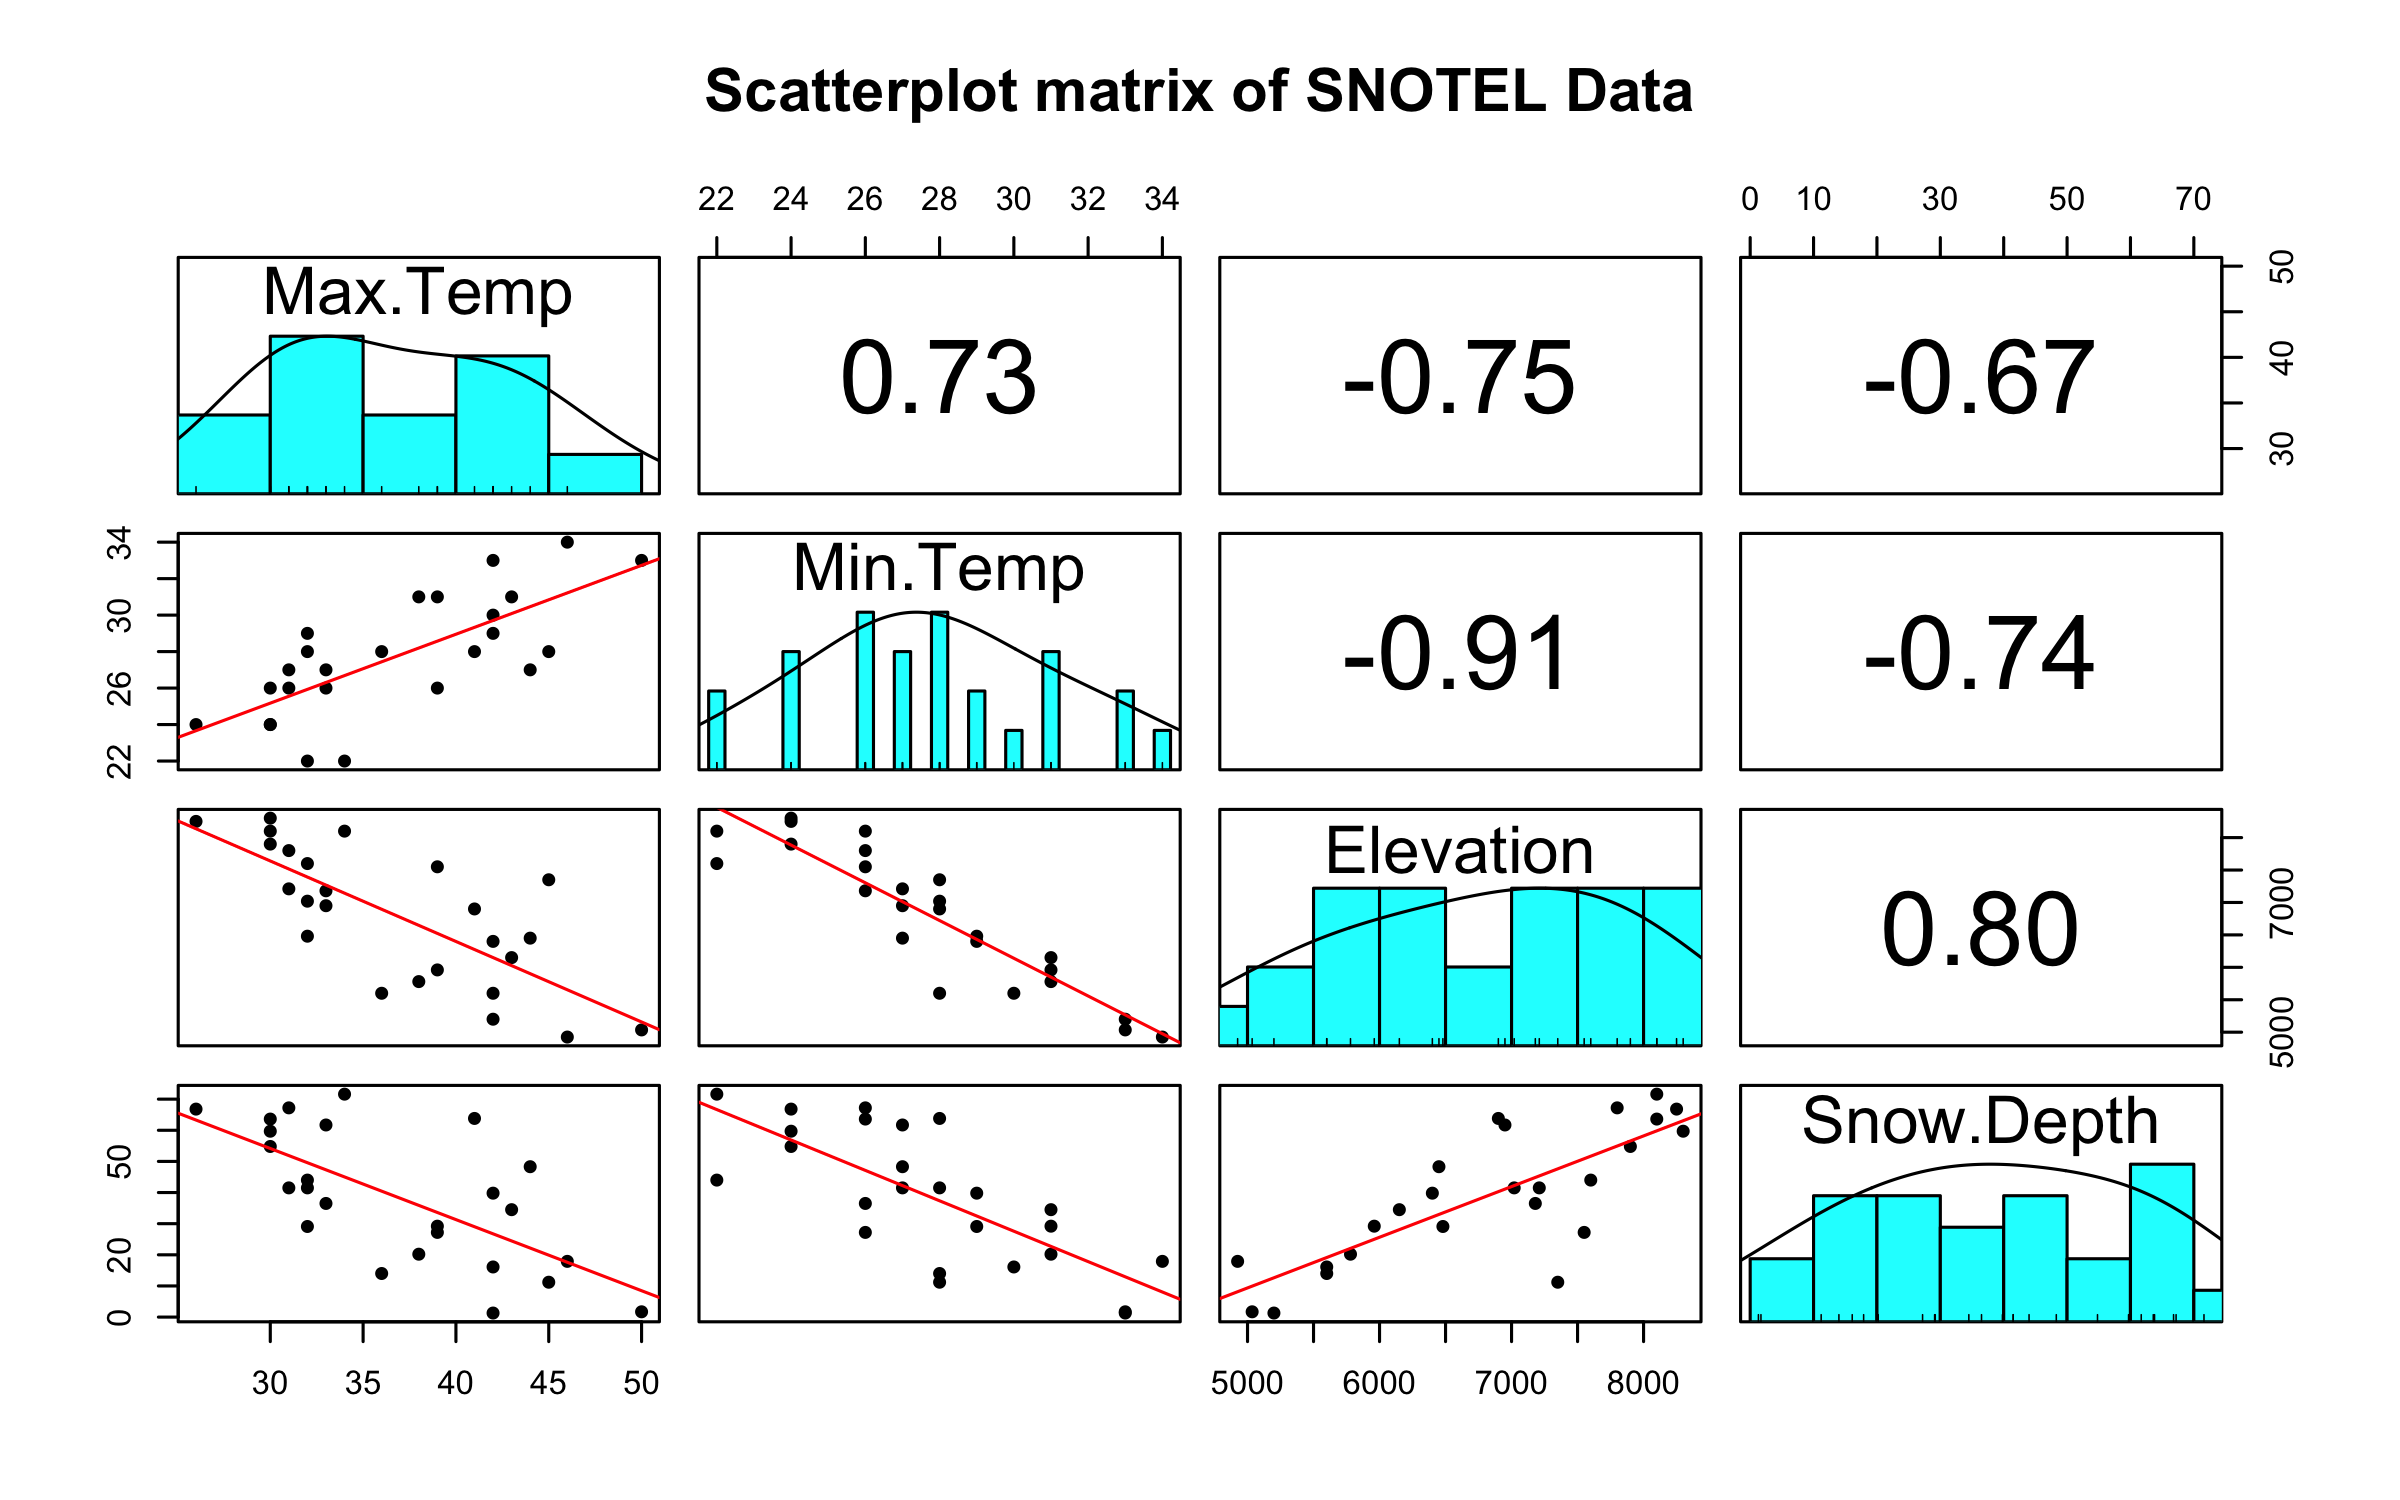

In [10]:
pairs.panels(snotel2[,-c(1:2)], ellipse=F,
             main="Scatterplot matrix of SNOTEL Data", lm=TRUE)

A bit more about this plot:
 * the -c(1:2) takes out the ID & Station columns these are just labels essentially so we don't want to plot them as discussed above
 * `lm=TRUE` plots lines instead of splines (*set to FALSE and see what happens on your own*)
 * `ellipse=FALSE` doesn't plot confidence intervals -- this and `lm=TRUE` are appropriate for MLR
 * Axis labels are at the top/bottom for columns and right/left side for rows
 
#### Adapted from the help page for pairs: 
pairs.panels shows a scatter plot of matrices (SPLOM), with bivariate scatter plots below the diagonal, histograms on the diagonal, and the Pearson correlation (R values) above the diagonal. Useful for descriptive statistics of small data sets. If lm=TRUE, linear regression fits are shown for both y by x and x by y. Correlation ellipses are also shown. Points may be given different colors depending upon some grouping variable. Robust fitting is done using lowess or loess regression. Confidence intervals of either the lm or loess are drawn if requested.

NOTE: the Pearson coeff is what we have been calling the "R" variable, i.e. cov(x,y).

NOTE: this is *not* $R_{adj}^2$, just the R2 cofficients for individual linear fits of variables vs. other variables.


Ok, so looking at our data, we can see there are *many* strong linear looking relationships!  neat!

For example: temperature & elevation are correlated this is not surprizing of course - it tends to get colder if we go up in elevation.  BUT: this creates a problem if we want to use both of them in a model to explain the snow depth this is the issue of *multicollinearity* or *collinearity*

Let's start by naively assuming we can model snow depth with one of the variables, and look at this more closely:

In [11]:
m1 = lm(Snow.Depth~Elevation, data=snotel2)
m2 = lm(Snow.Depth~Min.Temp, data=snotel2)
m3 = lm(Snow.Depth~Max.Temp, data=snotel2)

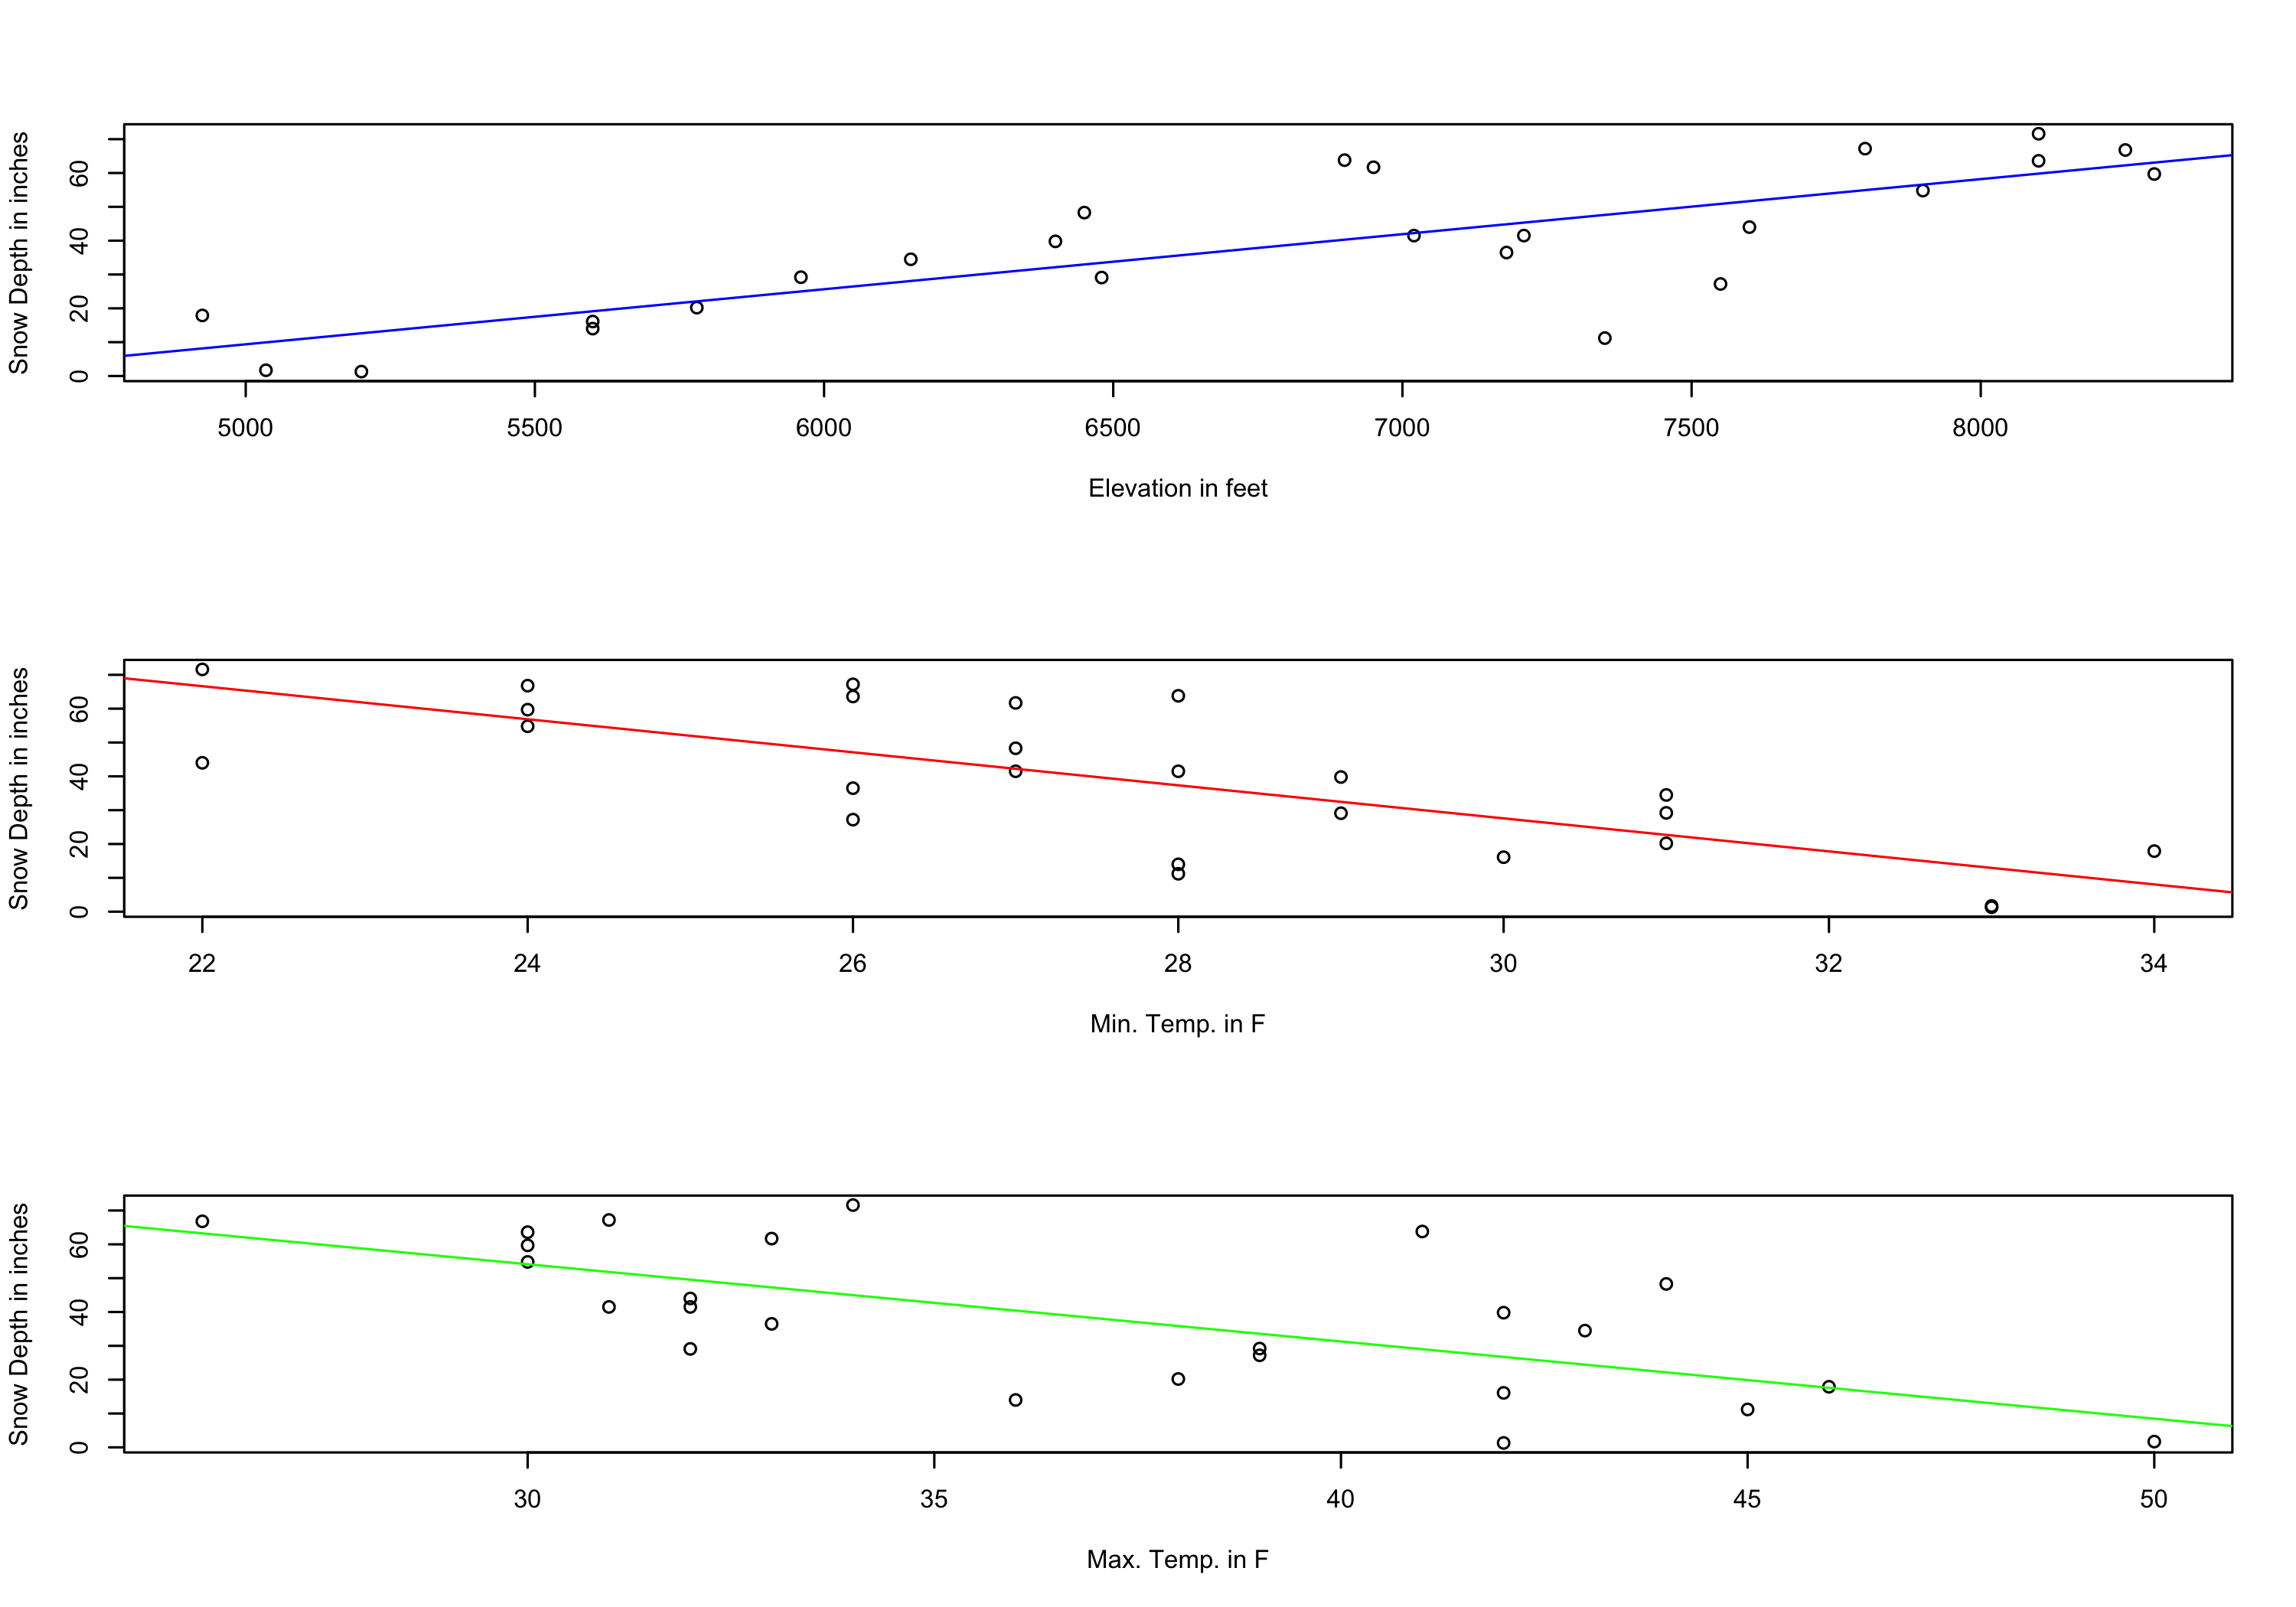

In [12]:
options(repr.plot.width=10, repr.plot.height=7)
par(mfrow=c(3,1))

plot(snotel2$Elevation, snotel2$Snow.Depth, xlab='Elevation in feet', ylab='Snow Depth in inches')
abline(m1, col="blue")

plot(snotel2$Min.Temp, snotel2$Snow.Depth, xlab='Min. Temp. in F', ylab='Snow Depth in inches')
abline(m2, col="red")

plot(snotel2$Max.Temp, snotel2$Snow.Depth, xlab='Max. Temp. in F', ylab='Snow Depth in inches')
abline(m3, col="green")

So, naively, we could think that any one of these variables could be a good predictor of snow depth.

Doing single linear fits to start with does give us a "feel" for our data - i.e. now snow depth changes with any one of these variables.

We can also look at summaries of each of these fits:

In [13]:
summary(m1)


Call:
lm(formula = Snow.Depth ~ Elevation, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.416  -5.135  -1.767   7.645  23.508 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -72.005873  17.712927  -4.065 0.000478 ***
Elevation     0.016275   0.002579   6.311 1.93e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.27 on 23 degrees of freedom
Multiple R-squared:  0.634,	Adjusted R-squared:  0.618 
F-statistic: 39.83 on 1 and 23 DF,  p-value: 1.933e-06


In [14]:
summary(m2)


Call:
lm(formula = Snow.Depth ~ Min.Temp, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.156 -11.238   2.810   9.846  26.444 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 174.0963    25.5628   6.811 6.04e-07 ***
Min.Temp     -4.8836     0.9148  -5.339 2.02e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.65 on 23 degrees of freedom
Multiple R-squared:  0.5534,	Adjusted R-squared:  0.534 
F-statistic:  28.5 on 1 and 23 DF,  p-value: 2.022e-05


In [15]:
summary(m3)


Call:
lm(formula = Snow.Depth ~ Max.Temp, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.447 -10.367  -4.394  10.042  34.774 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 122.6723    19.6380   6.247 2.25e-06 ***
Max.Temp     -2.2840     0.5257  -4.345 0.000238 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 23 degrees of freedom
Multiple R-squared:  0.4508,	Adjusted R-squared:  0.4269 
F-statistic: 18.88 on 1 and 23 DF,  p-value: 0.0002385


Looking at the p-values for each of these slopes - it looks like *any* of them are good predictors of snow depth, so if we had applied SLR naively we'd get "good" fits, but any SLR is leaving out the information that would come from fitting with the other parameters.

#But, using all of them should, in theory, give us a better estimation of snow depth!  But lets find out!

So how do we do that?  Well the call in R is relatively simple:

In [16]:
mfull = lm(Snow.Depth~Elevation+Min.Temp+Max.Temp, data=snotel2)

In [17]:
summary(mfull)


Call:
lm(formula = Snow.Depth ~ Elevation + Min.Temp + Max.Temp, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.508  -7.679  -3.139   9.627  26.394 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -10.506529  99.616286  -0.105   0.9170  
Elevation     0.012332   0.006536   1.887   0.0731 .
Min.Temp     -0.504970   2.042614  -0.247   0.8071  
Max.Temp     -0.561892   0.673219  -0.835   0.4133  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.6 on 21 degrees of freedom
Multiple R-squared:  0.6485,	Adjusted R-squared:  0.5983 
F-statistic: 12.91 on 3 and 21 DF,  p-value: 5.328e-05


So, lets look at some plots!

NOTE: you might not be able to install this, but it's not crucial, we can just look at it here and get a sense of what is going on.  It also does not run properly in jupyter notebook and this is still in dev.  However, to install & load we'd do:


In [23]:
#install.packages("effects")
require(effects)

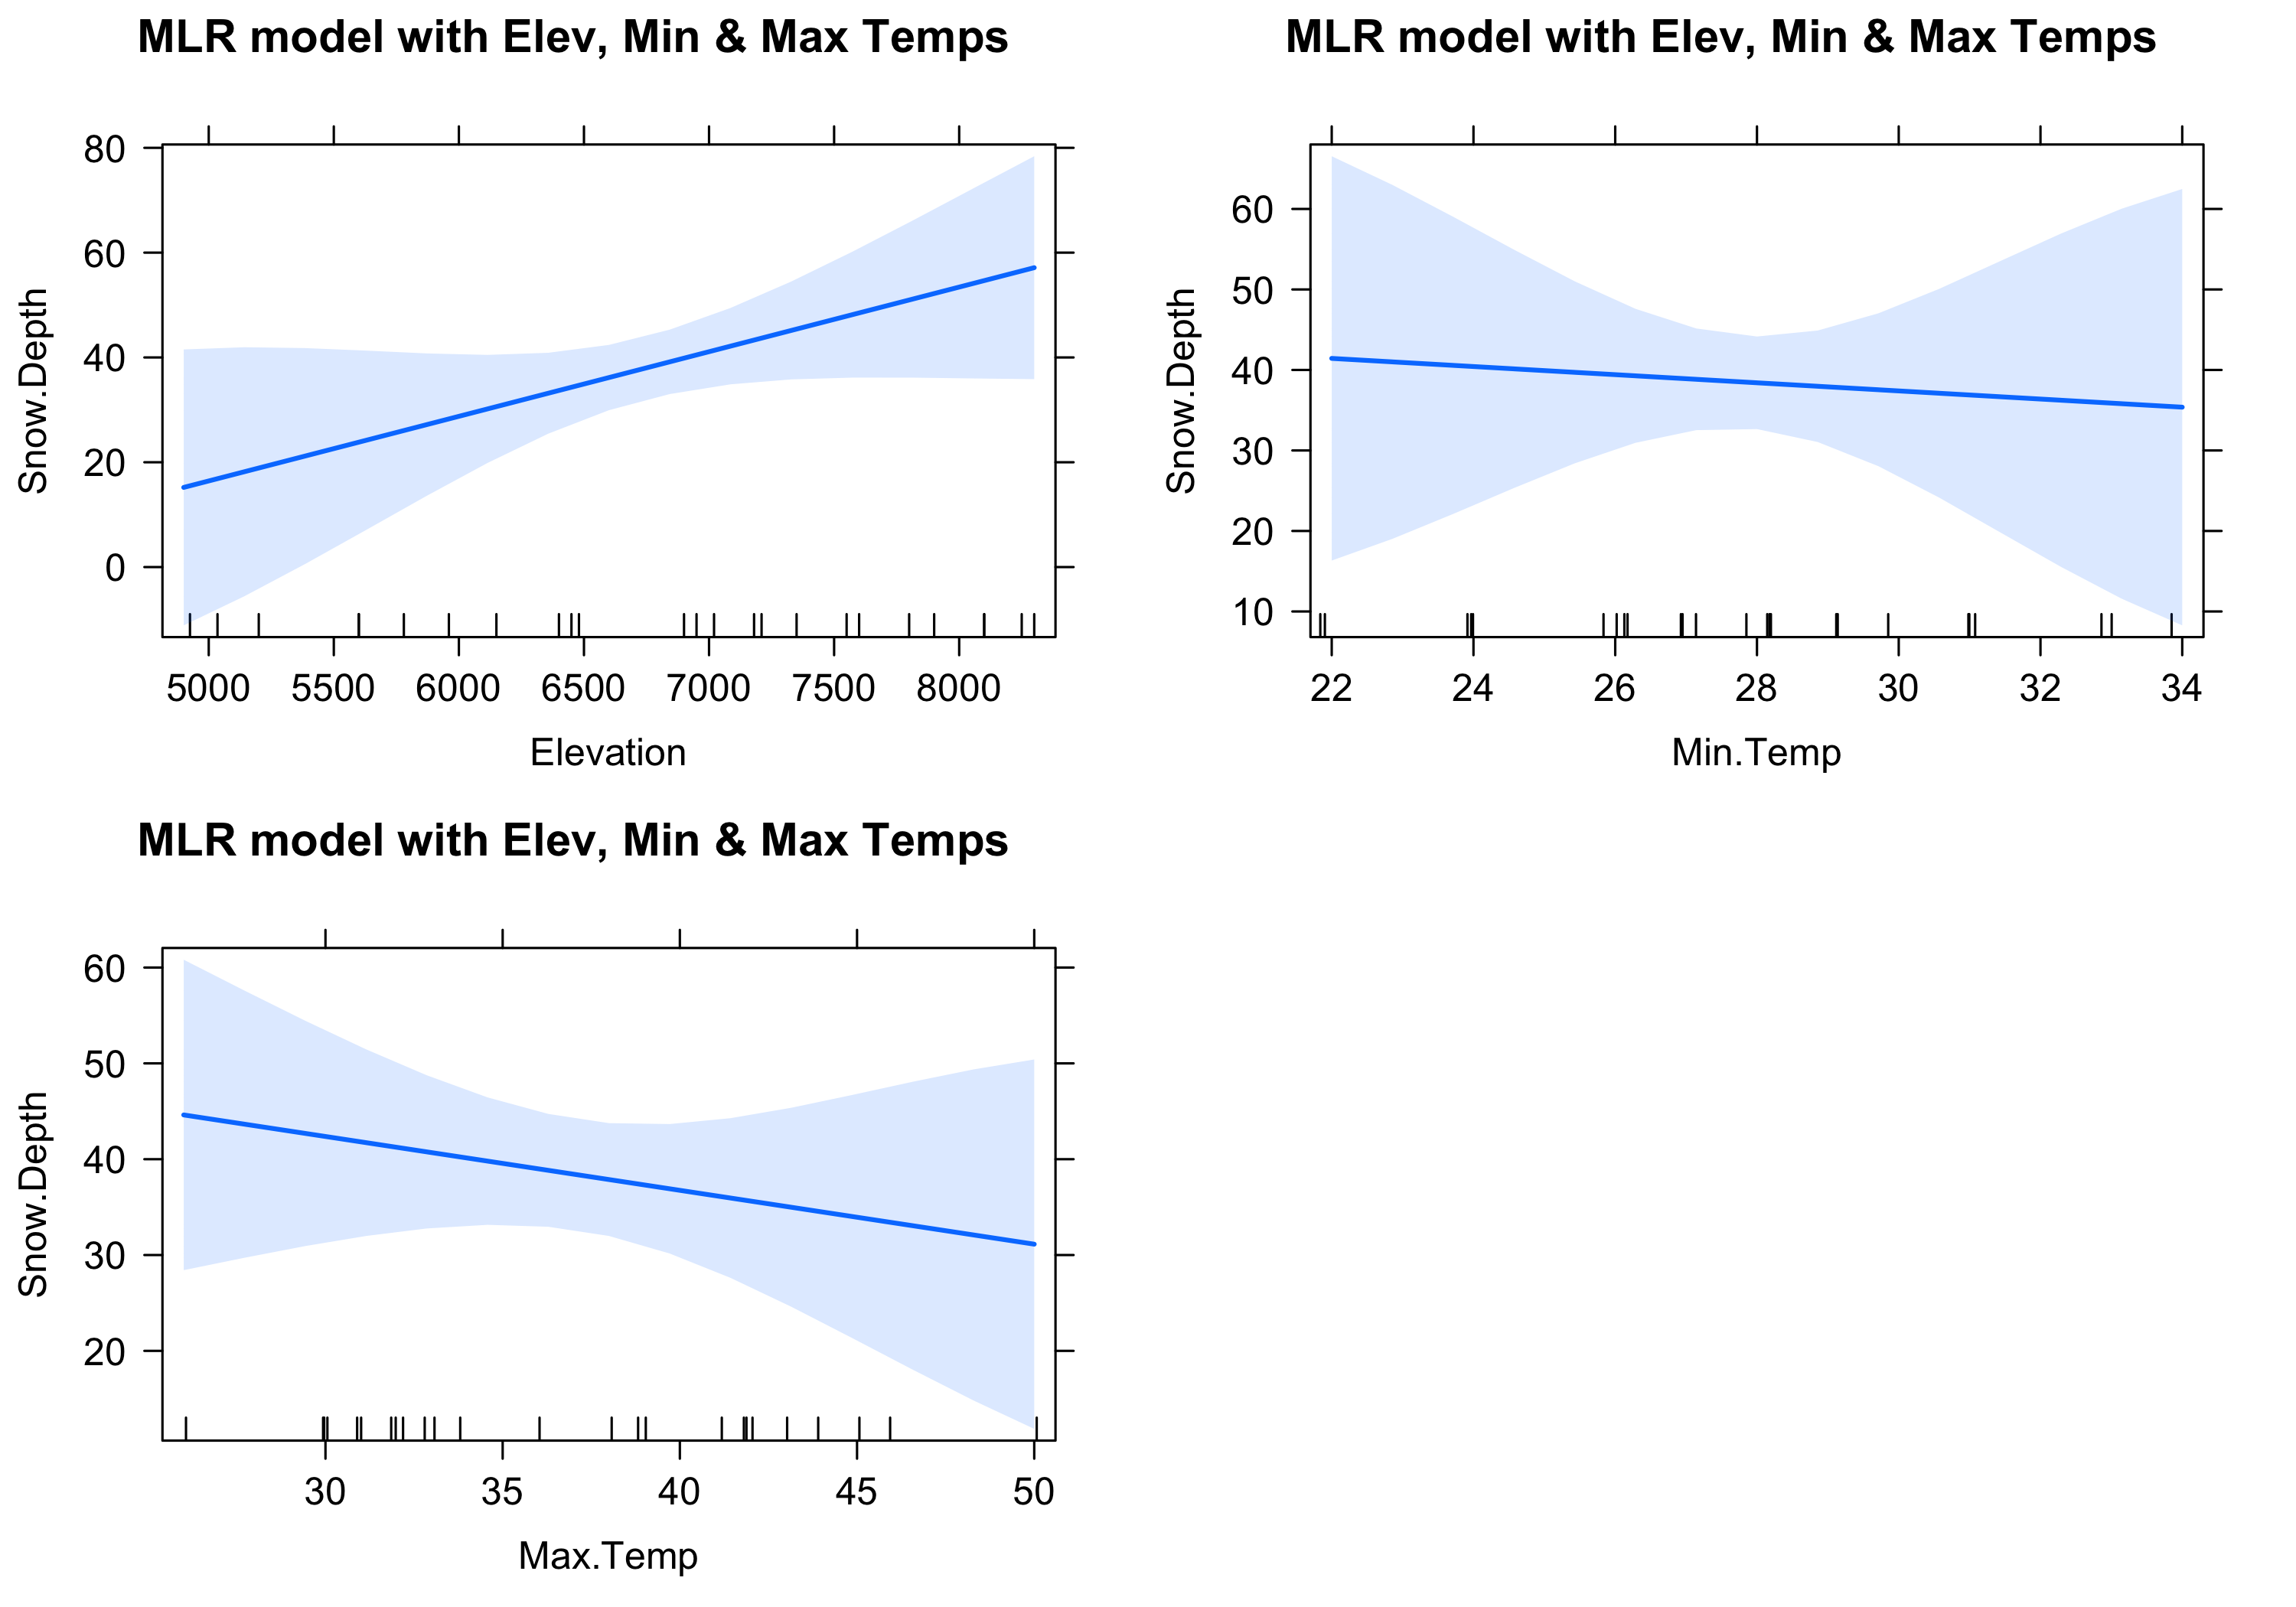

In [24]:
plot(allEffects(mfull), main="MLR model with Elev, Min & Max Temps")

What does this "fanny" part tell us?  Basically, its giving us a measure of how uncertain we can be in all variables.

Let's look at the high end of elevation - if the elevation is high, then the snow depth will still be relatively high, even if the min & max daily temperature is high (or low) this fanning out is effected by the collinarity.

These plots are another way to visualize the results of the "summary", but again, not crucial.

We can compare slopes between the SLR and MLR:

In [25]:
summary(m3)


Call:
lm(formula = Snow.Depth ~ Max.Temp, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.447 -10.367  -4.394  10.042  34.774 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 122.6723    19.6380   6.247 2.25e-06 ***
Max.Temp     -2.2840     0.5257  -4.345 0.000238 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.25 on 23 degrees of freedom
Multiple R-squared:  0.4508,	Adjusted R-squared:  0.4269 
F-statistic: 18.88 on 1 and 23 DF,  p-value: 0.0002385


In [26]:
summary(mfull)


Call:
lm(formula = Snow.Depth ~ Elevation + Min.Temp + Max.Temp, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.508  -7.679  -3.139   9.627  26.394 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -10.506529  99.616286  -0.105   0.9170  
Elevation     0.012332   0.006536   1.887   0.0731 .
Min.Temp     -0.504970   2.042614  -0.247   0.8071  
Max.Temp     -0.561892   0.673219  -0.835   0.4133  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.6 on 21 degrees of freedom
Multiple R-squared:  0.6485,	Adjusted R-squared:  0.5983 
F-statistic: 12.91 on 3 and 21 DF,  p-value: 5.328e-05


We notice that while they are the same sign, they change in actual value.

## 3. BACK TO SLIDES TO DISCUSS CONDITIONS TO USE MLR

## 4. Outliers and outlier removal with the Snow-Depth dataset

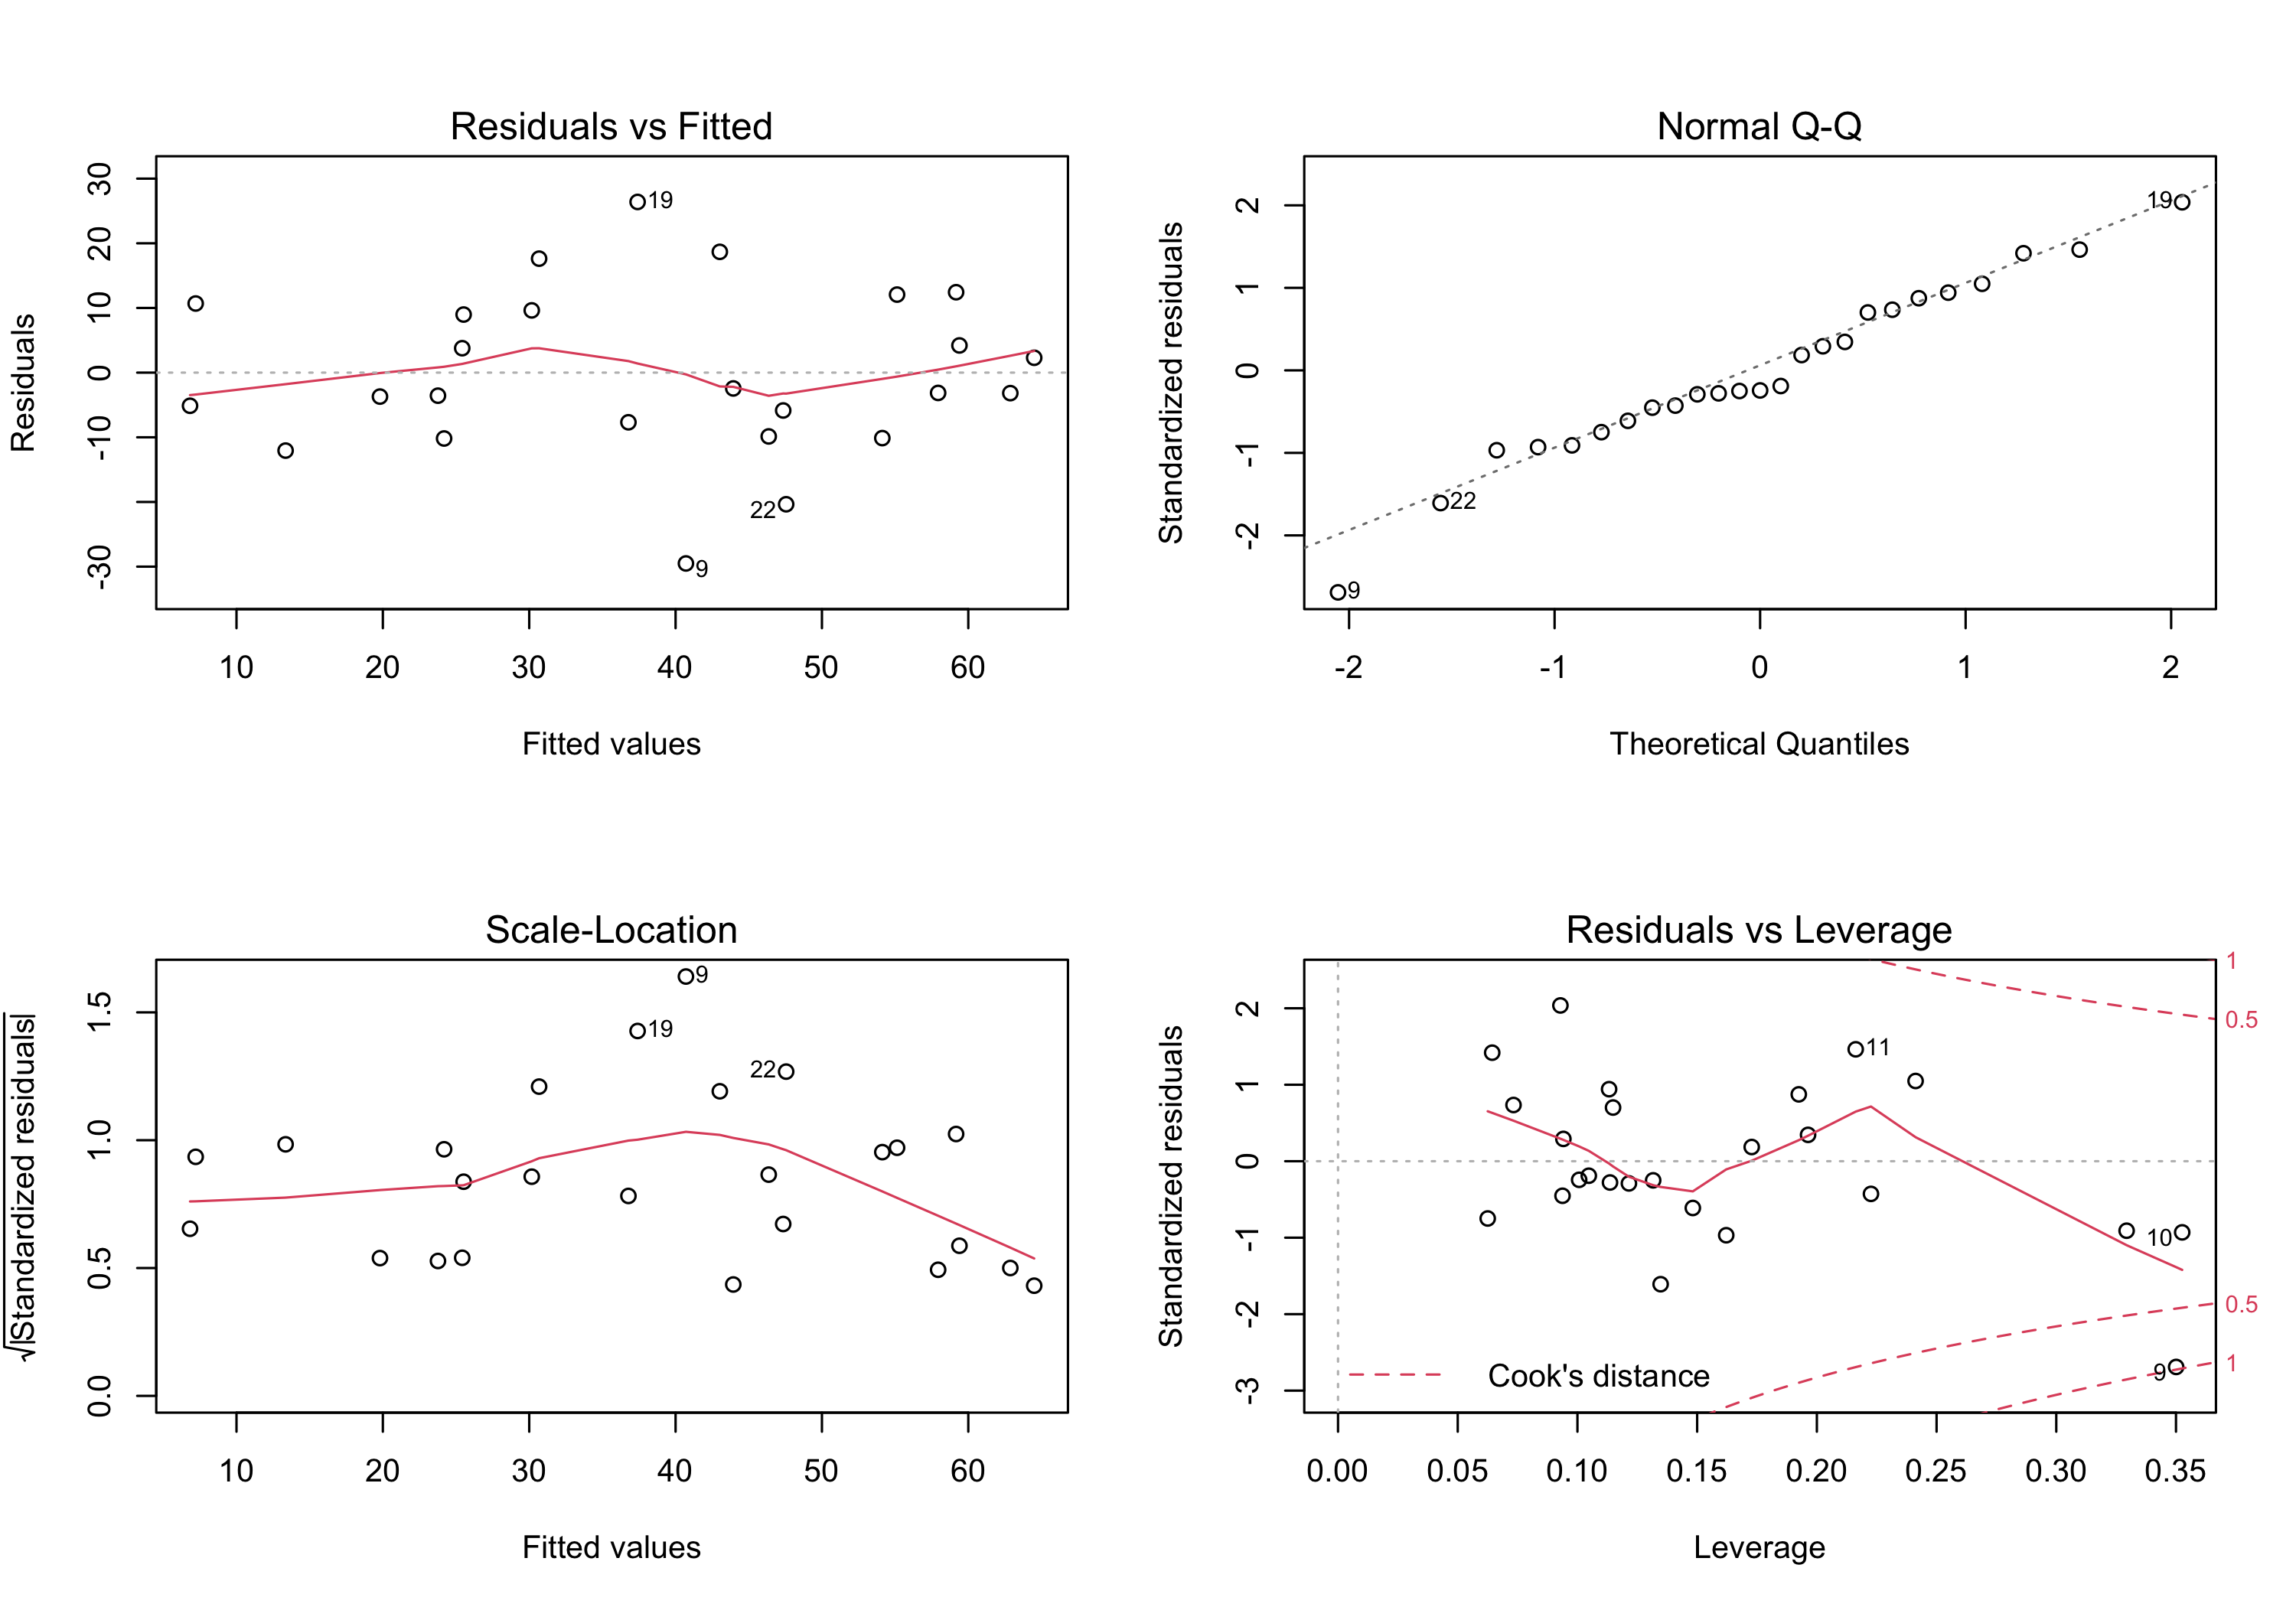

In [27]:
par(mfrow=c(2,2))#, oma=c(0,0,2,0))
plot(mfull, sub.caption='Diagnostics for our MLR Fit') # may not need sub.caption!

Let's apply some of our thinking from last lecture with SLR to look for interesting points.

We see a little bit of a dip in the residuals vs Fitted plot and also a bit in the qq-plot, but otherwise, we see that residuals look pretty normal too.

Checking out the residuals vs. leverage we see that there is possibly 1 leveraging outlier, point - point 9. We can print out this point to see what it is:

In [28]:
print(snotel2[c(9),])

  ID             Station Max.Temp Min.Temp Elevation Snow.Depth
9 18 Northeast Entrance        45       28      7350       11.2


Let's compare to what the result should be:

In [29]:
intercept = mfull$coefficients[1] # intercept
elevation = mfull$coefficients[2] # slope on elevation
minTemp = mfull$coefficients[3] # slope on minTemp
maxTemp = mfull$coefficients[4] # slope on maxTemp

Let's grab the data:

In [41]:
outlier_9th = snotel2[c(9),]
outlier_9th$Snow.Depth

[1] 11.2

And also what would we predict with our model? (We can use the `predict` function, but we'll calculate this by hand for now):

In [37]:
result_9th = unname(intercept) + unname(elevation)*outlier_9th$Elevation + 
  unname(minTemp)*outlier_9th$Min.Temp + unname(maxTemp)*outlier_9th$Max.Temp

In [38]:
result_9th

[1] 40.70784

How different is this from the observed result?  Let's calculate the residual by hand:

In [43]:
result_9th-outlier_9th$Snow.Depth

[1] 29.50784

So we see that this particular point misses the snow depth by almost 30 inches!

NOTE: in the HW you used the "predict" function to figure out new points, here, we are doing it by hand for illustritive purposes.

## 5. Addressing Collinearity

While we should be very very careful about removing outliers, let us proceed in good faith that this is indeed a wonky point and remove it & refit:

In [44]:
mfull_take2 <- lm(Snow.Depth~Elevation+Min.Temp+Max.Temp, data=snotel2[-9,])

In [45]:
summary(mfull_take2)


Call:
lm(formula = Snow.Depth ~ Elevation + Min.Temp + Max.Temp, data = snotel2[-9, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-29.2918  -4.9757  -0.9146   5.4292  20.4260 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.424e+02  9.210e+01  -1.546  0.13773   
Elevation    2.141e-02  6.101e-03   3.509  0.00221 **
Min.Temp     6.722e-01  1.733e+00   0.388  0.70217   
Max.Temp     5.078e-01  6.486e-01   0.783  0.44283   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.29 on 20 degrees of freedom
Multiple R-squared:  0.7522,	Adjusted R-squared:  0.715 
F-statistic: 20.24 on 3 and 20 DF,  p-value: 2.843e-06


Ok, lets take a look.  In RStudio you can use the `effects` package again:


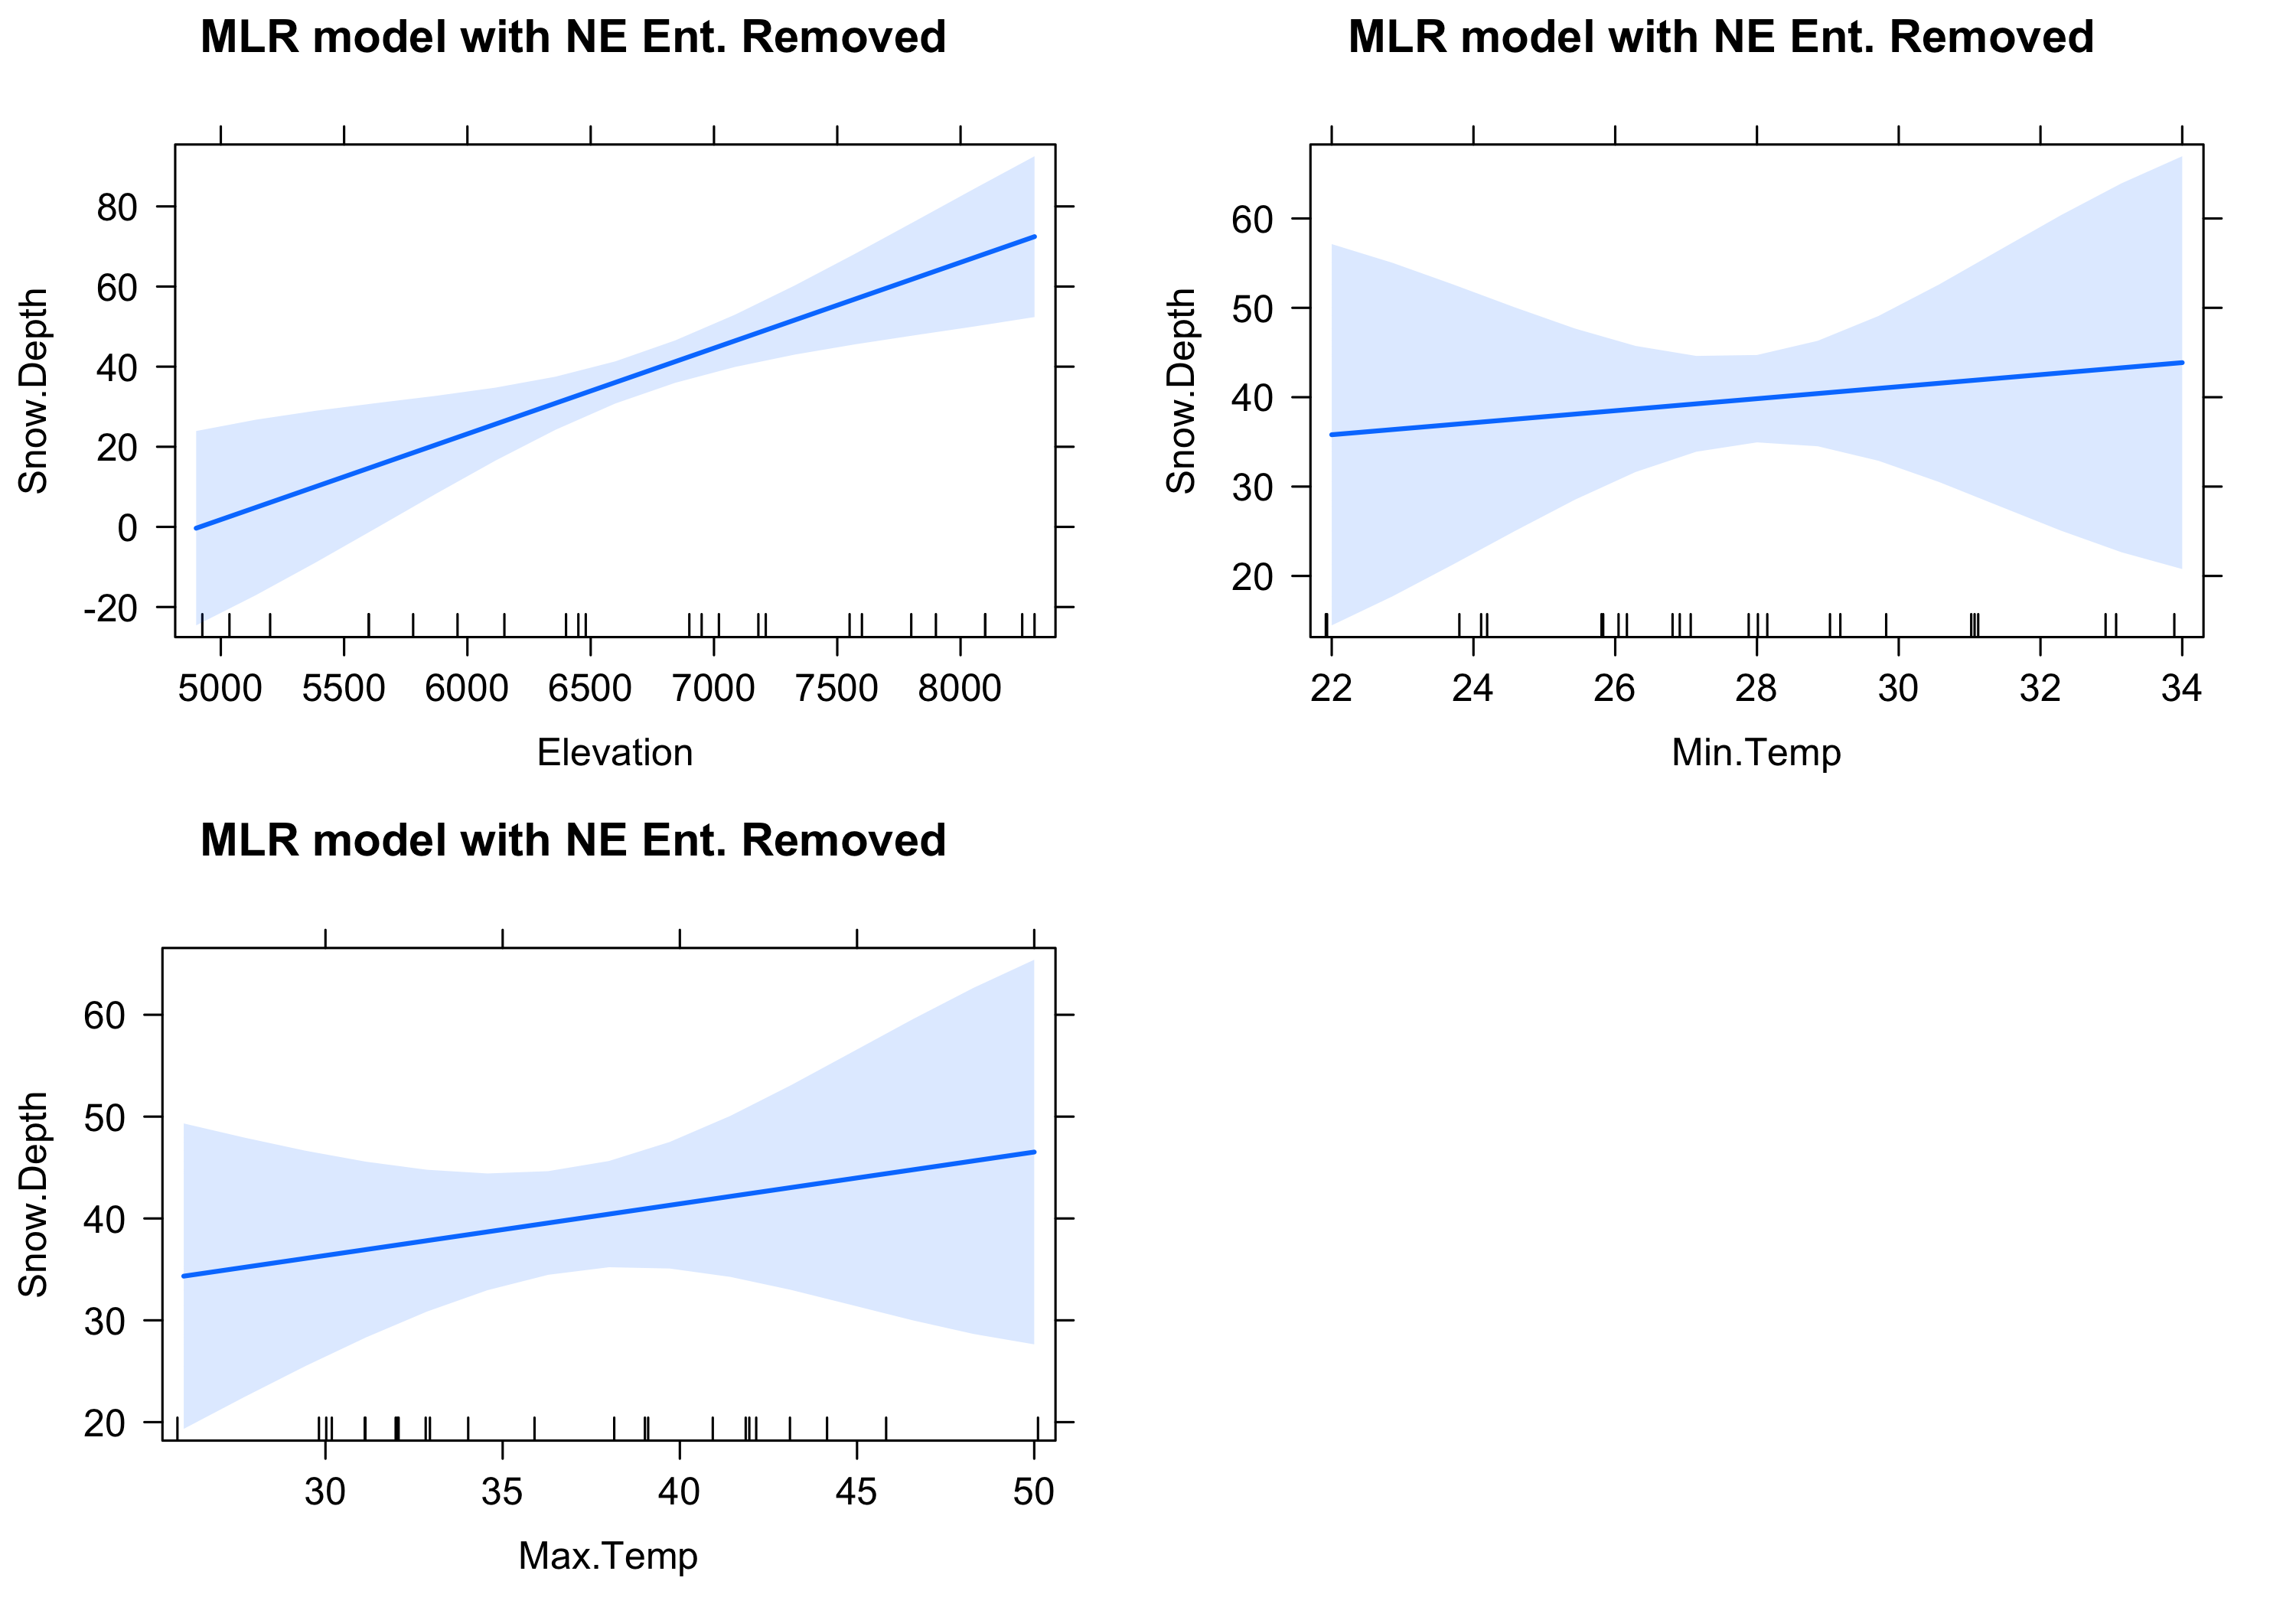

In [46]:
plot(allEffects(mfull_take2), main="MLR model with NE Ent. Removed")

Ok, now something super weird looking is happening: it looks like warmer temperatures are related to higher snow depths!?!

This seems counter intuative. HOWEVER: what is going on is that this can be explained by interpreting them as the estimated change in the response for changes in temperature *after we control for the impacts of elevation*.

So: elevation, with its small p-value, is controlling much of what is going on, but perhaps places where it is high, and its just snowed, the temperature is higher? or maybe this is just a weird day.

We already checked linearity with our every-by-everything plot but lets re-check to remind our selves of how linear things are we can even take out our 9th point:

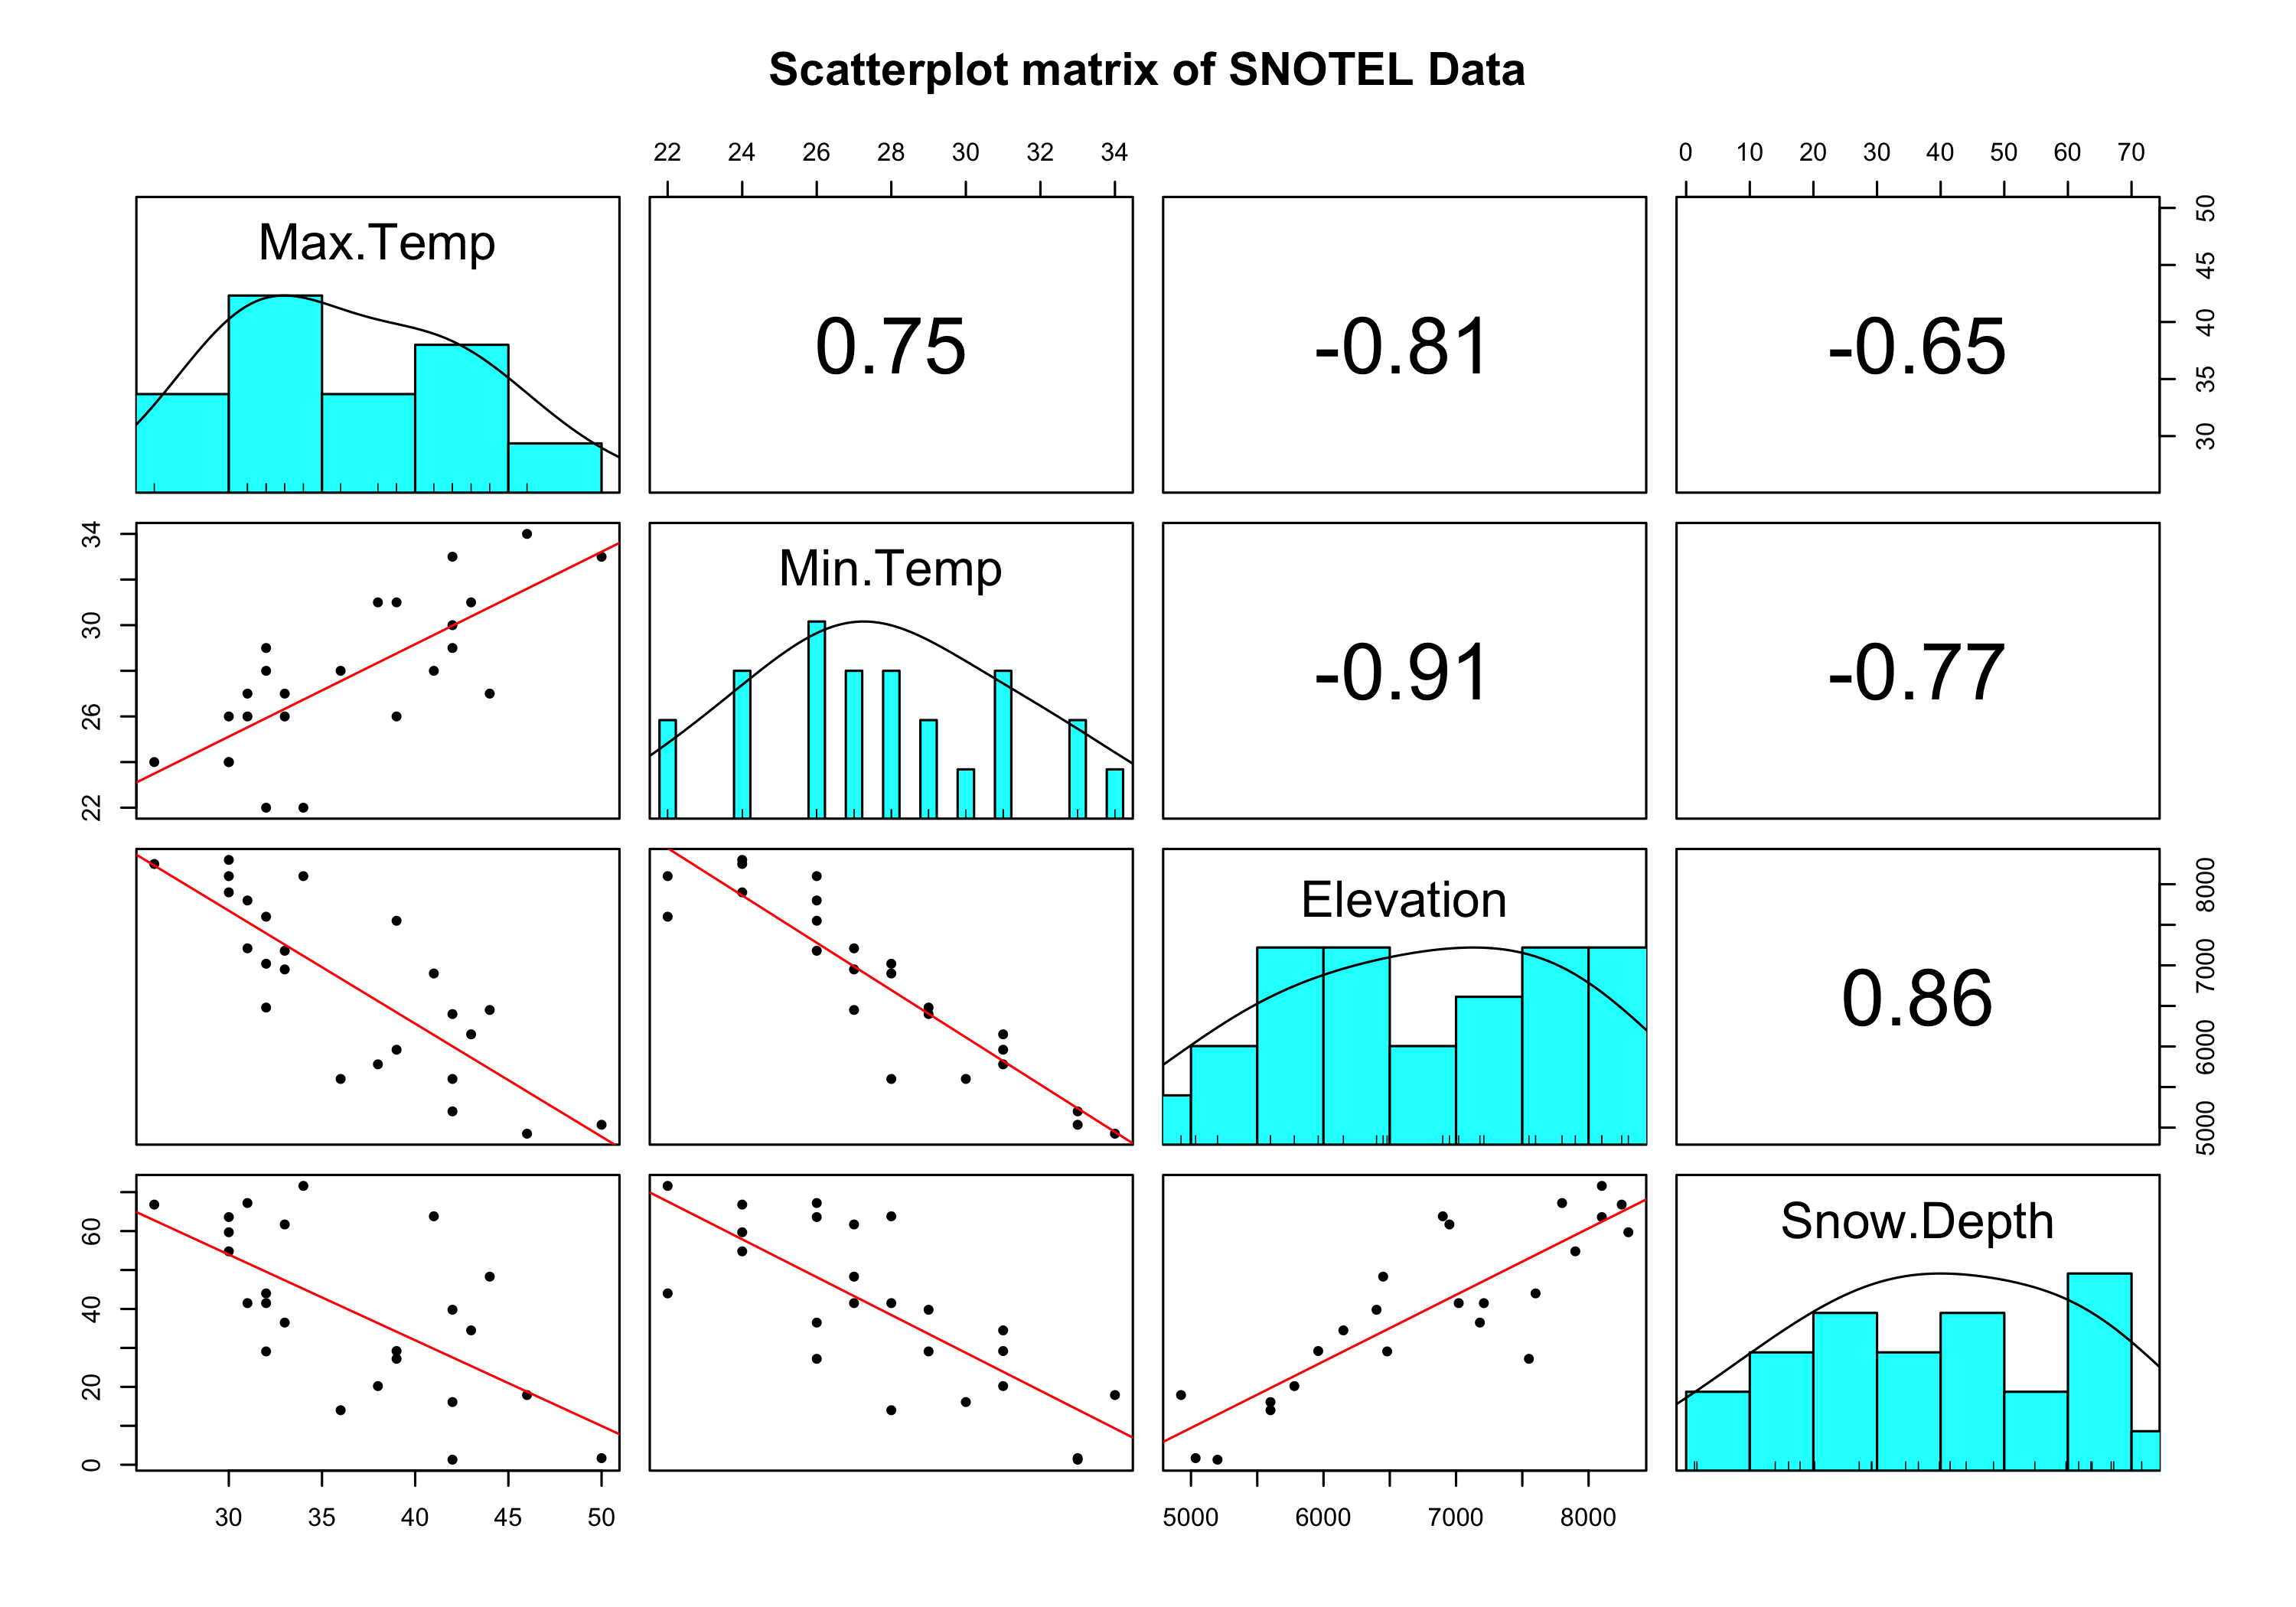

In [47]:
pairs.panels(snotel2[-9,-c(1:2)], ellipse=F,
             main="Scatterplot matrix of SNOTEL Data", lm=TRUE)

As for collinearity - we already knew this was a bit of an issue as we have very high correlations between explanatory variables - between -0.75 & -0.91.

#### Aside
Let's look at this in a bit more detail with a pretty graph:

In [48]:
#install.packages("corrplot") # run once

In [50]:
require(corrplot)

Loading required package: corrplot

corrplot 0.84 loaded



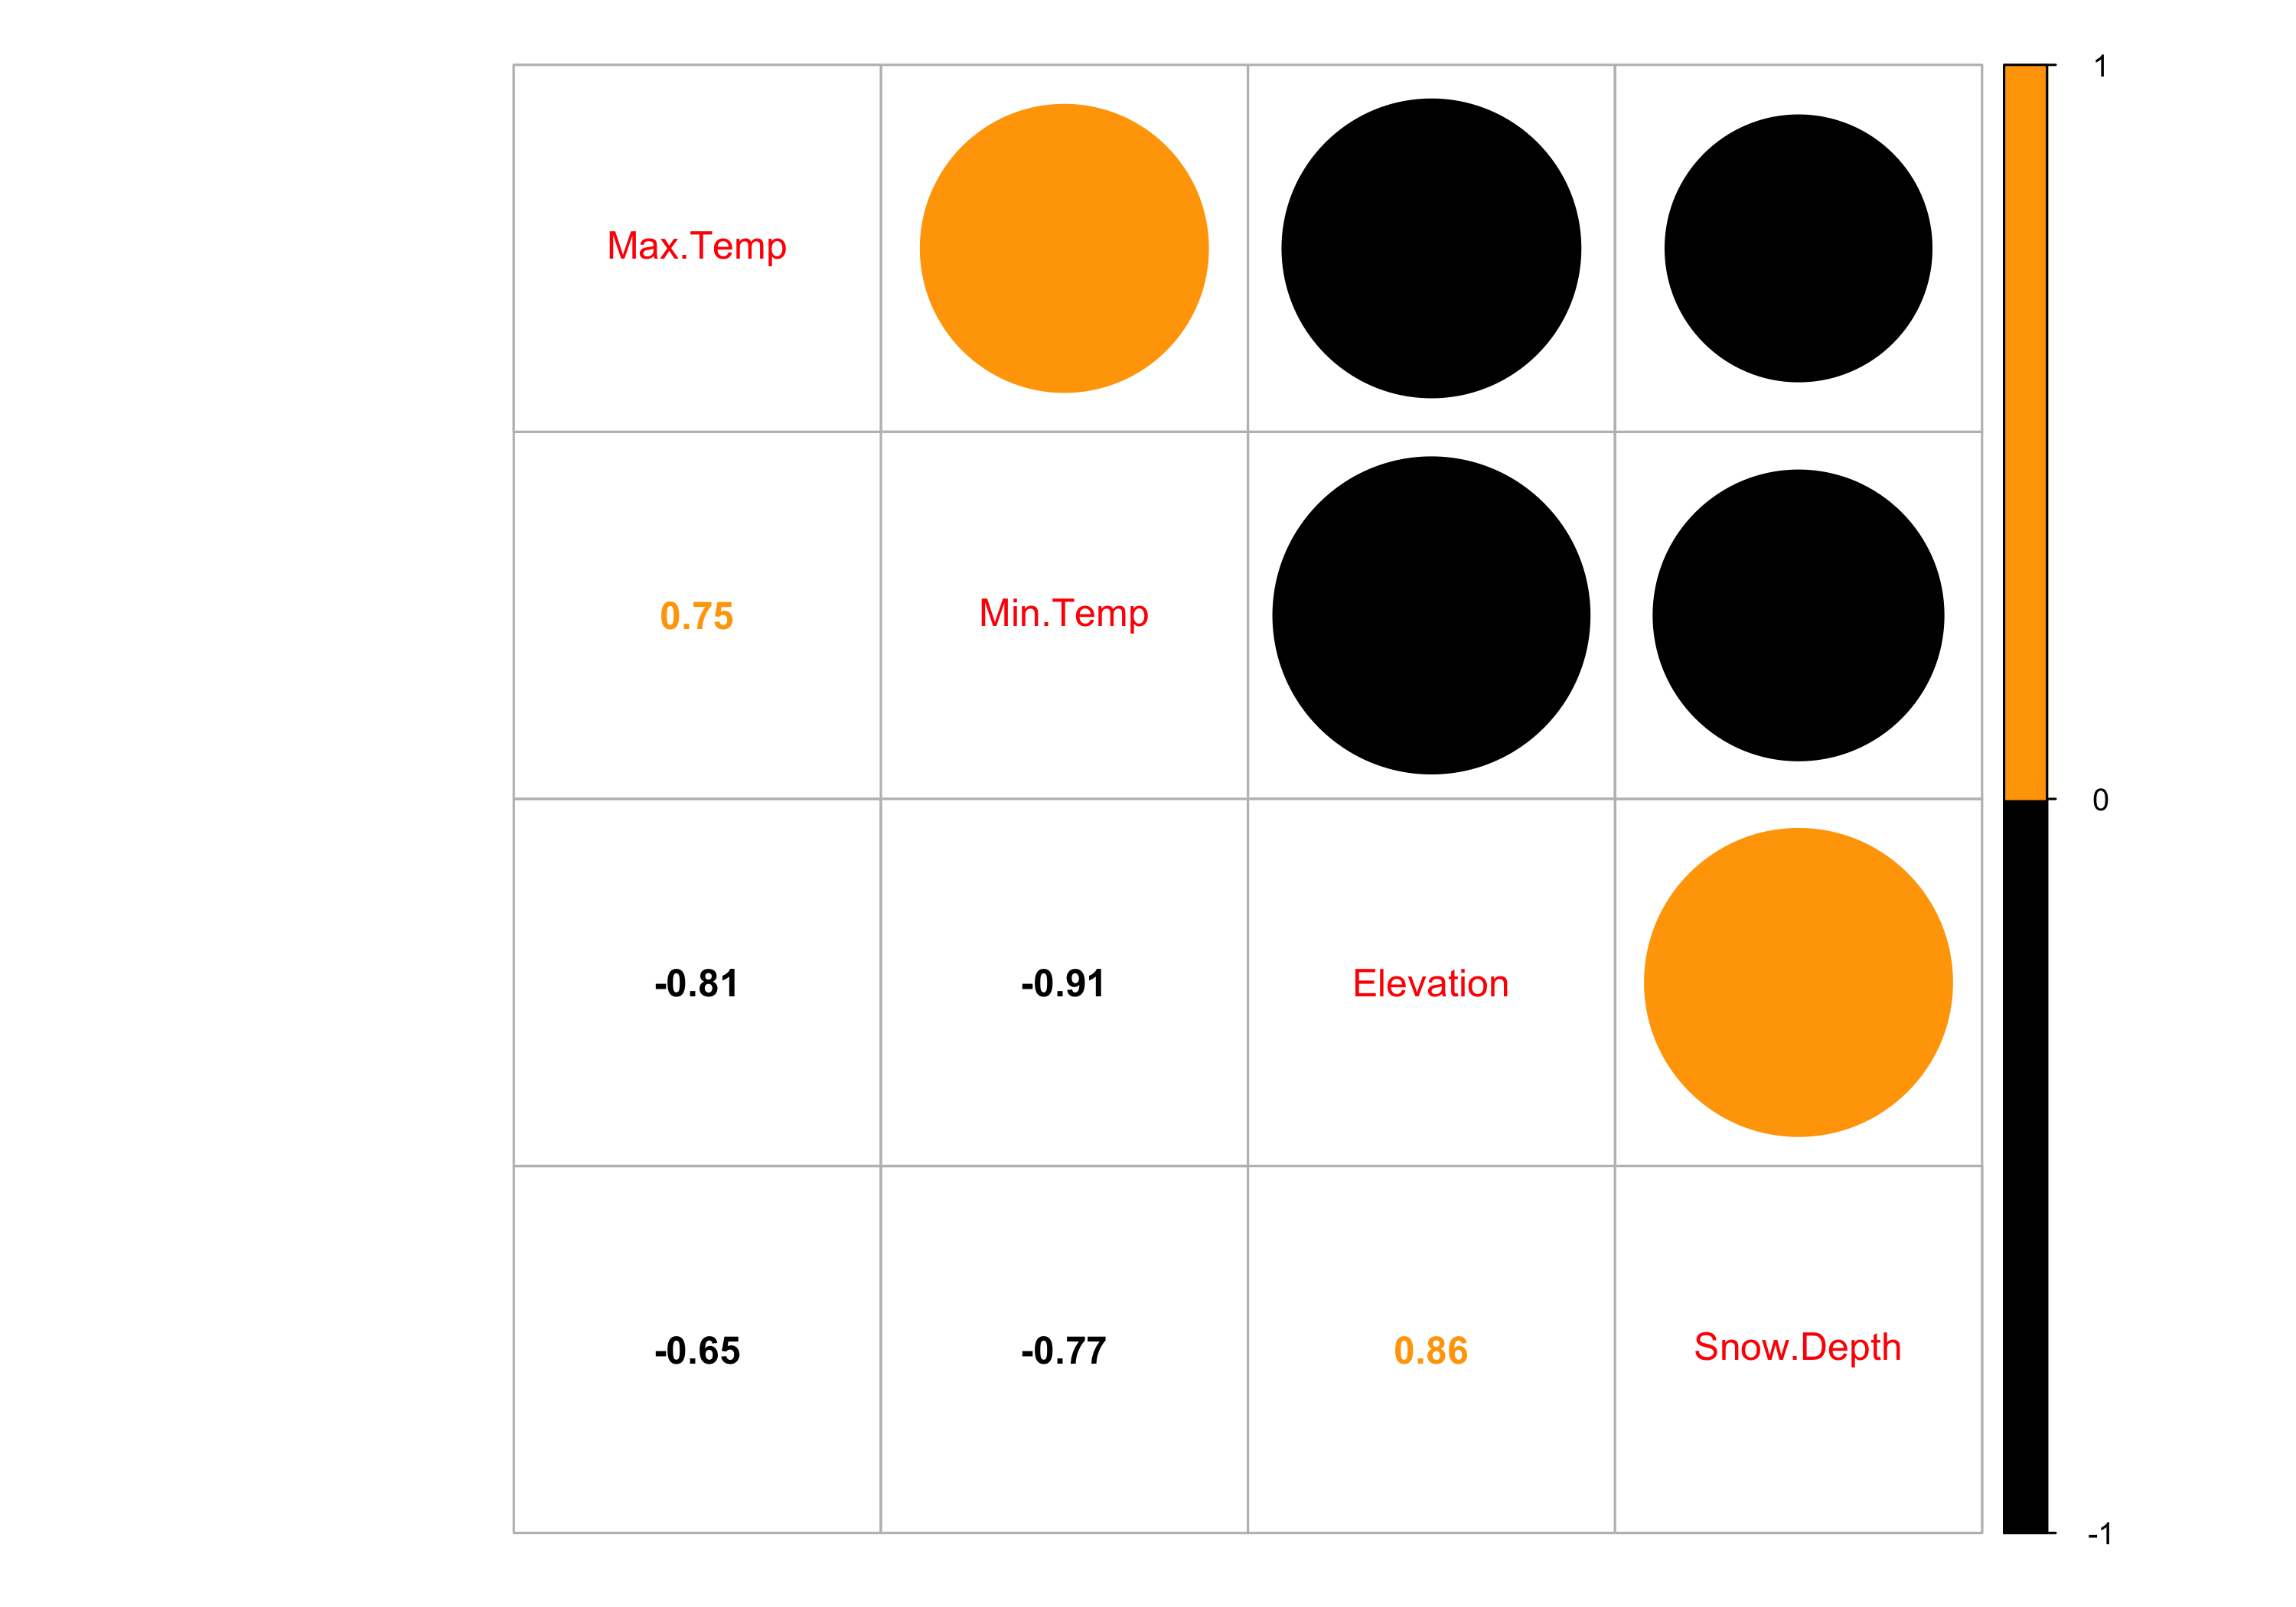

In [51]:
par(mfrow=c(1,1), oma=c(0,0,1,0))
corrplot.mixed(cor(snotel2[-9,-c(1:2)]), upper.col=c(1, "orange"),
               lower.col=c(1, "orange"))

We also have access to these values:

In [52]:
round(cor(snotel2[-c(9,22),3:6]),2)

Max.Temp Min.Temp Elevation Snow.Depth
Max.Temp    1.00     0.77    -0.84     -0.64     
Min.Temp    0.77     1.00    -0.91     -0.79     
Elevation  -0.84    -0.91     1.00      0.90     
Snow.Depth -0.64    -0.79     0.90      1.00

Here the size of each dot is telling us how correlated one of the variables is with another and black means negative correlation while orange means positive.

There are very large and very small values of R, the correlation coefficient meaning, there are moderate to strong relationships.

#### End aside

While there is nothing we can do about it at this stage, we can get an estimate for how big of a problem collinearity is for any given slope estimate using the "Varience Inflation Factor" - VIF.

Essentially a VIF is a measure of how collinear a variable is so, large VIF is bad and the rule of thumb is that VIF > 5 or 10 is bad.

Let's look at vifs of our last fit:

In [53]:
#install.packages("car") # run once, in Anaconda install `r-car`
require(car)

Loading required package: car

Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit




In [54]:
vif(mfull_take2)

Elevation  Min.Temp  Max.Temp 
 7.639341  6.047469  2.926287

This shows the biggest problems for Elevation being collinear with min temp which we can also see in our plot where min temp and elevation cross.

We can also get a measure for how big the standard errors (SE) are because of collinarity:

In [55]:
sqrt(vif(mfull_take2))

Elevation  Min.Temp  Max.Temp 
 2.763936  2.459160  1.710639

This tells us that the SE for elevation is about 2.8 times LARGER than it should be because of multicollinairity with other variables in the model.

We can see this further by regressing elevation based on the other varaibles:

In [56]:
elev = lm(Elevation~Min.Temp+Max.Temp, data=snotel2[-9,])

In [57]:
summary(elev)


Call:
lm(formula = Elevation ~ Min.Temp + Max.Temp, data = snotel2[-9, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1136.90  -151.50    10.76   227.46   623.83 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14745.00     705.88  20.889 1.57e-15 ***
Min.Temp     -223.28      38.31  -5.829 8.72e-06 ***
Max.Temp      -48.78      20.61  -2.367   0.0276 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 403.6 on 21 degrees of freedom
Multiple R-squared:  0.8691,	Adjusted R-squared:  0.8566 
F-statistic: 69.71 on 2 and 21 DF,  p-value: 5.345e-10


We see our $R_{adj}^2$ ~ 0.86, meaning that a high percentage of Elevation can be explained by a linear model using the min & max temperatures.

We can also re-derive the VIF calculation from the output of this regression:

$\rm{VIF}(\hat{\beta}_j) = \frac{1}{1 - R^2_{X_j \rm{|} X_{-j}}}$

In [58]:
vif(mfull_take2)[1]

Elevation 
 7.639341

Compared to:

In [59]:
vifEl = 1.0/(1.0-summary(elev)$r.squared)
vifEl

[1] 7.639341

## 6. BACK TO SLIDES TO DISCUSS COLLINEARITY & MODEL SELECTION

## 7. Bonus: Class exercise with Snow-Depth data

**Q1:** Now that we know that elevation and max and min temp are related, how do our fits change if we only regress on the max and min temp? Or elevation and one of the temperatures? Based on forward selection what would fits on 1 paramter look like?  Which one should we choose? What about 2 parameters? (1 = elevation, 2= maxtemp, 3 = min temp)

**A1:**

In [60]:
m_less <- lm(Snow.Depth~Min.Temp+Max.Temp, data=snotel2)
summary(m_less)


Call:
lm(formula = Snow.Depth ~ Min.Temp + Max.Temp, data = snotel2)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.4590  -9.6083  -0.7052  10.5260  30.0239 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 172.0126    25.1230   6.847 7.06e-07 ***
Min.Temp     -3.5656     1.3115  -2.719   0.0125 *  
Max.Temp     -0.9366     0.6797  -1.378   0.1821    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.37 on 22 degrees of freedom
Multiple R-squared:  0.5889,	Adjusted R-squared:  0.5515 
F-statistic: 15.76 on 2 and 22 DF,  p-value: 5.671e-05


In [61]:
m_less2 <- lm(Snow.Depth~Elevation+Max.Temp, data=snotel2)
summary(m_less2)


Call:
lm(formula = Snow.Depth ~ Elevation + Max.Temp, data = snotel2)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.089  -8.057  -3.010   9.665  26.265 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -32.079583  47.010472  -0.682  0.50211   
Elevation     0.013615   0.003886   3.503  0.00201 **
Max.Temp     -0.593379   0.646801  -0.917  0.36888   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.31 on 22 degrees of freedom
Multiple R-squared:  0.6474,	Adjusted R-squared:  0.6154 
F-statistic:  20.2 on 2 and 22 DF,  p-value: 1.046e-05


**Q2:** Redo the full fit analysis for high elevation data:

In [62]:
snotel3 = subset(snotel2, snotel2$Elevation < 6500)

What changes?  Does this make sense with your intuition? Use pairs.panels & corrplot to visualize this.

**A2:**

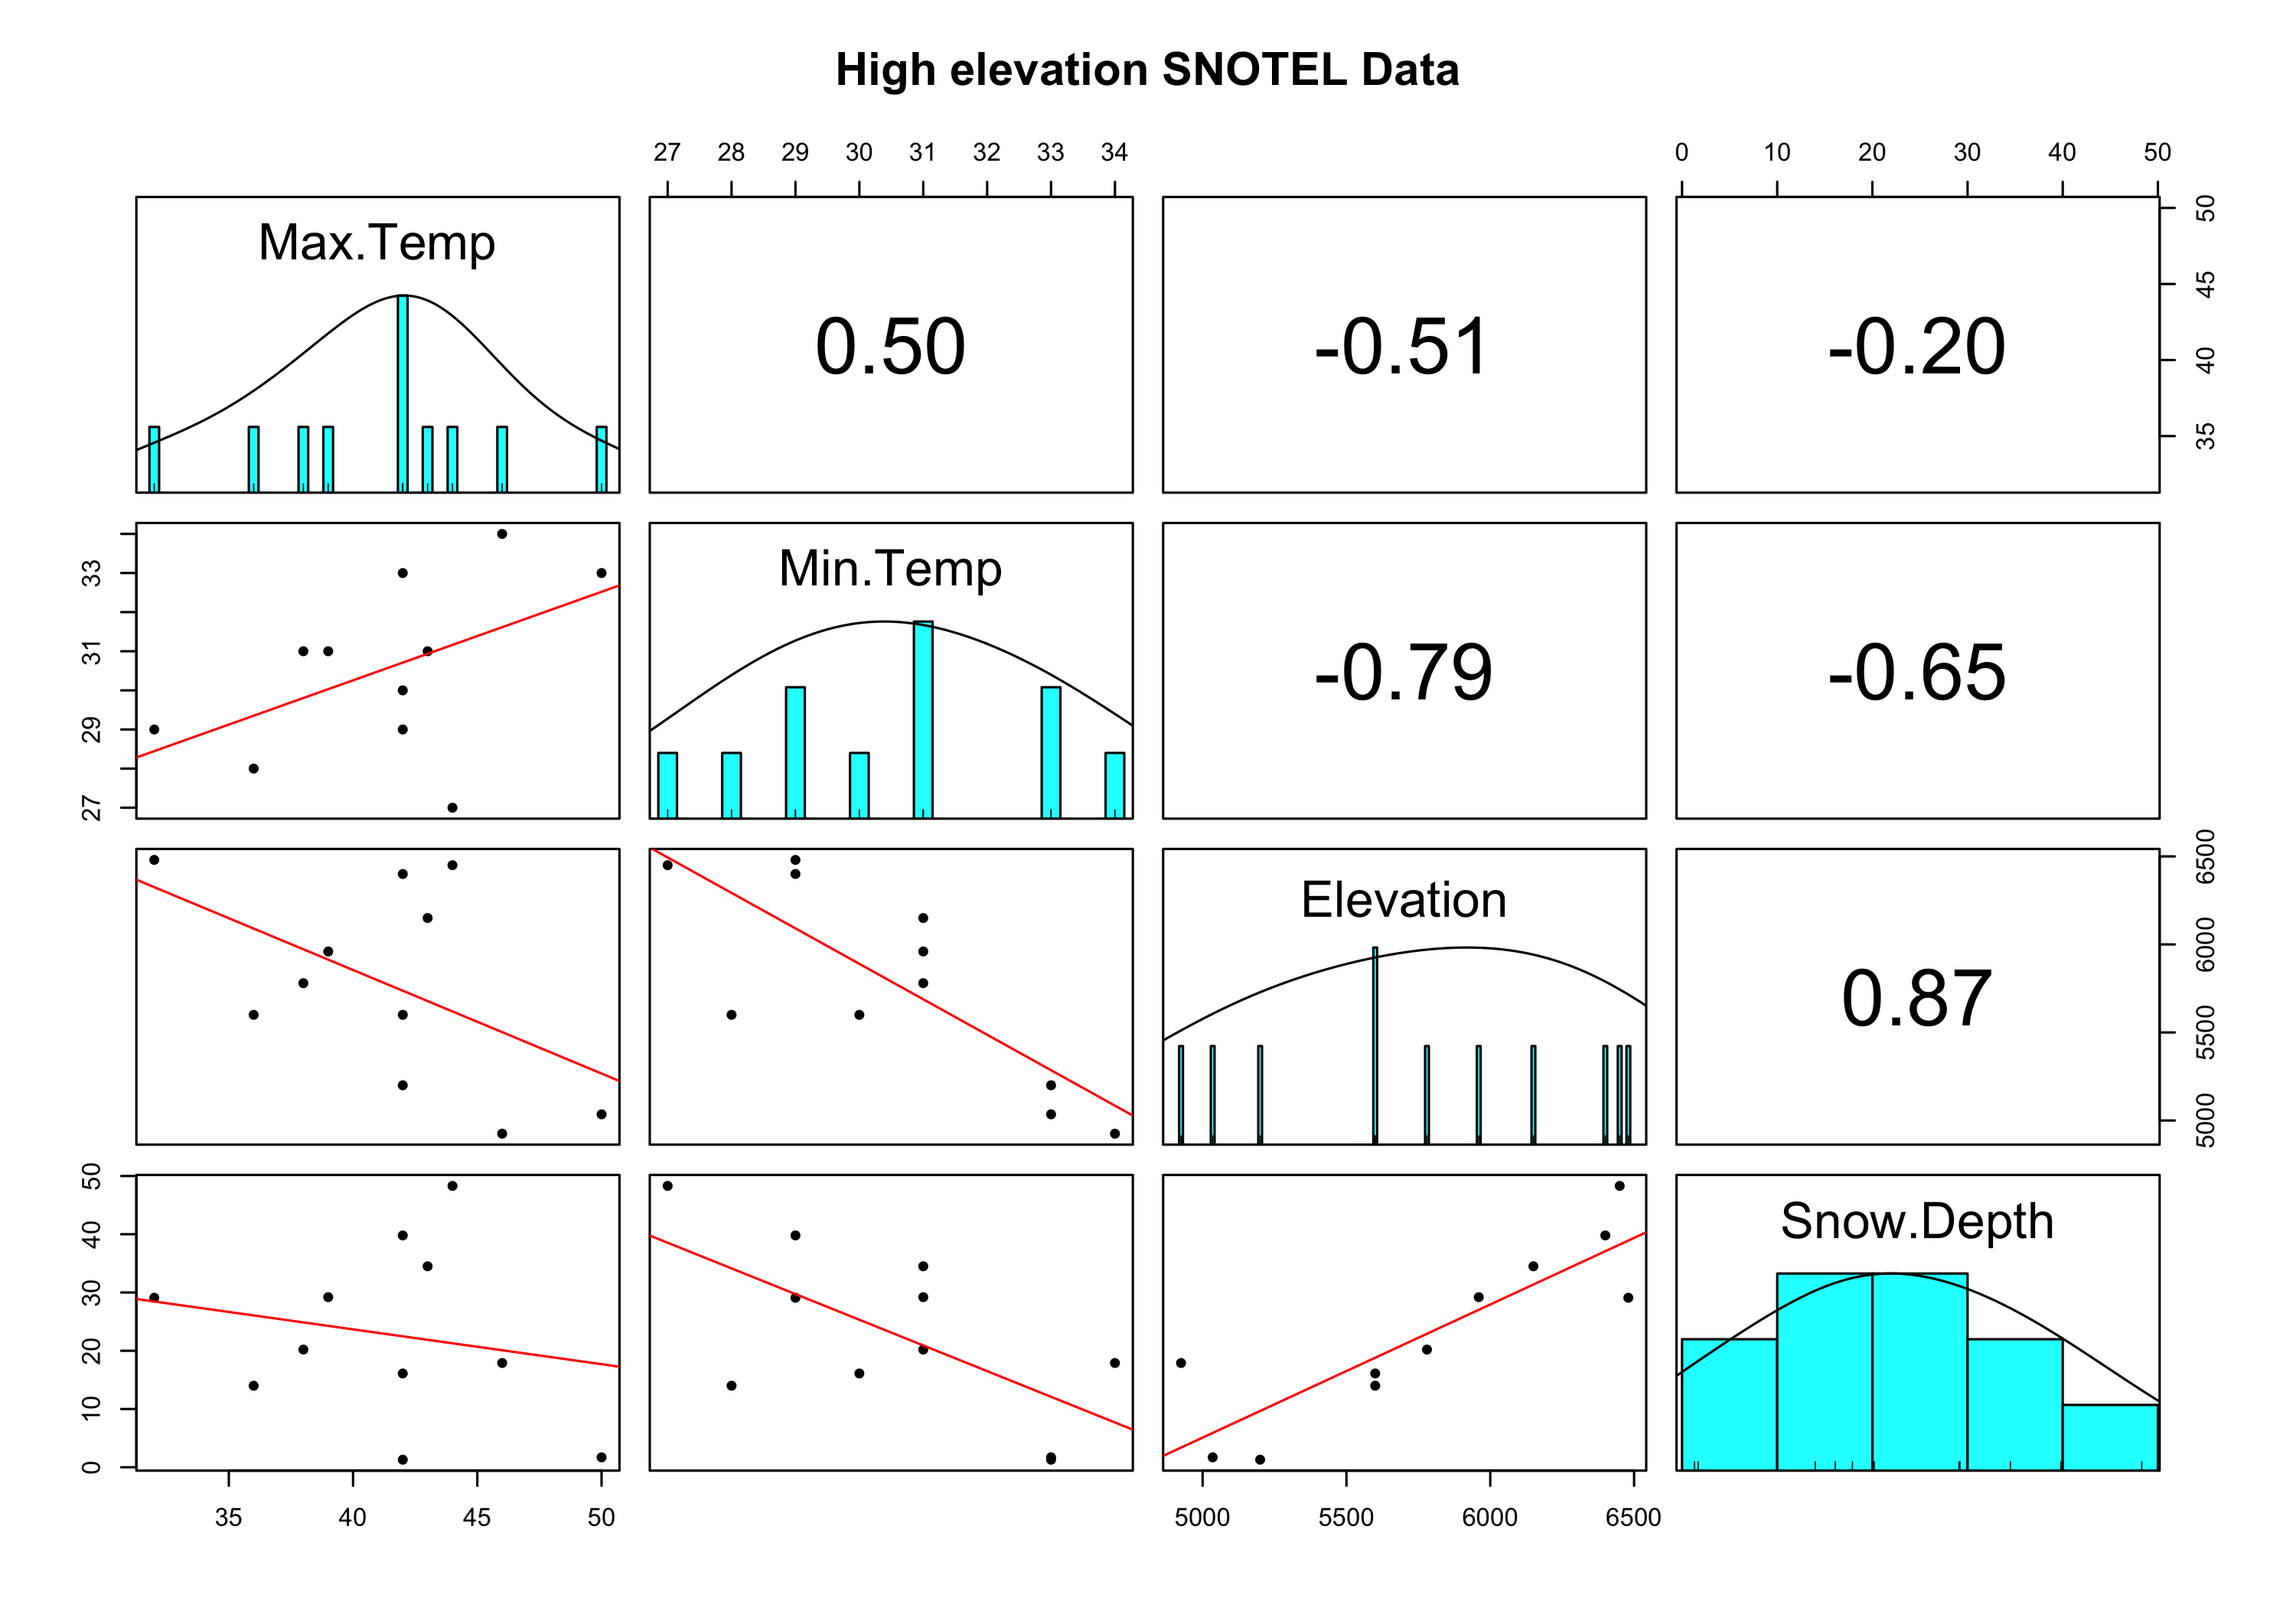

In [63]:
pairs.panels(snotel3[,-c(1:2)], ellipse=F,
             main="High elevation SNOTEL Data", lm=TRUE)

From the aside:

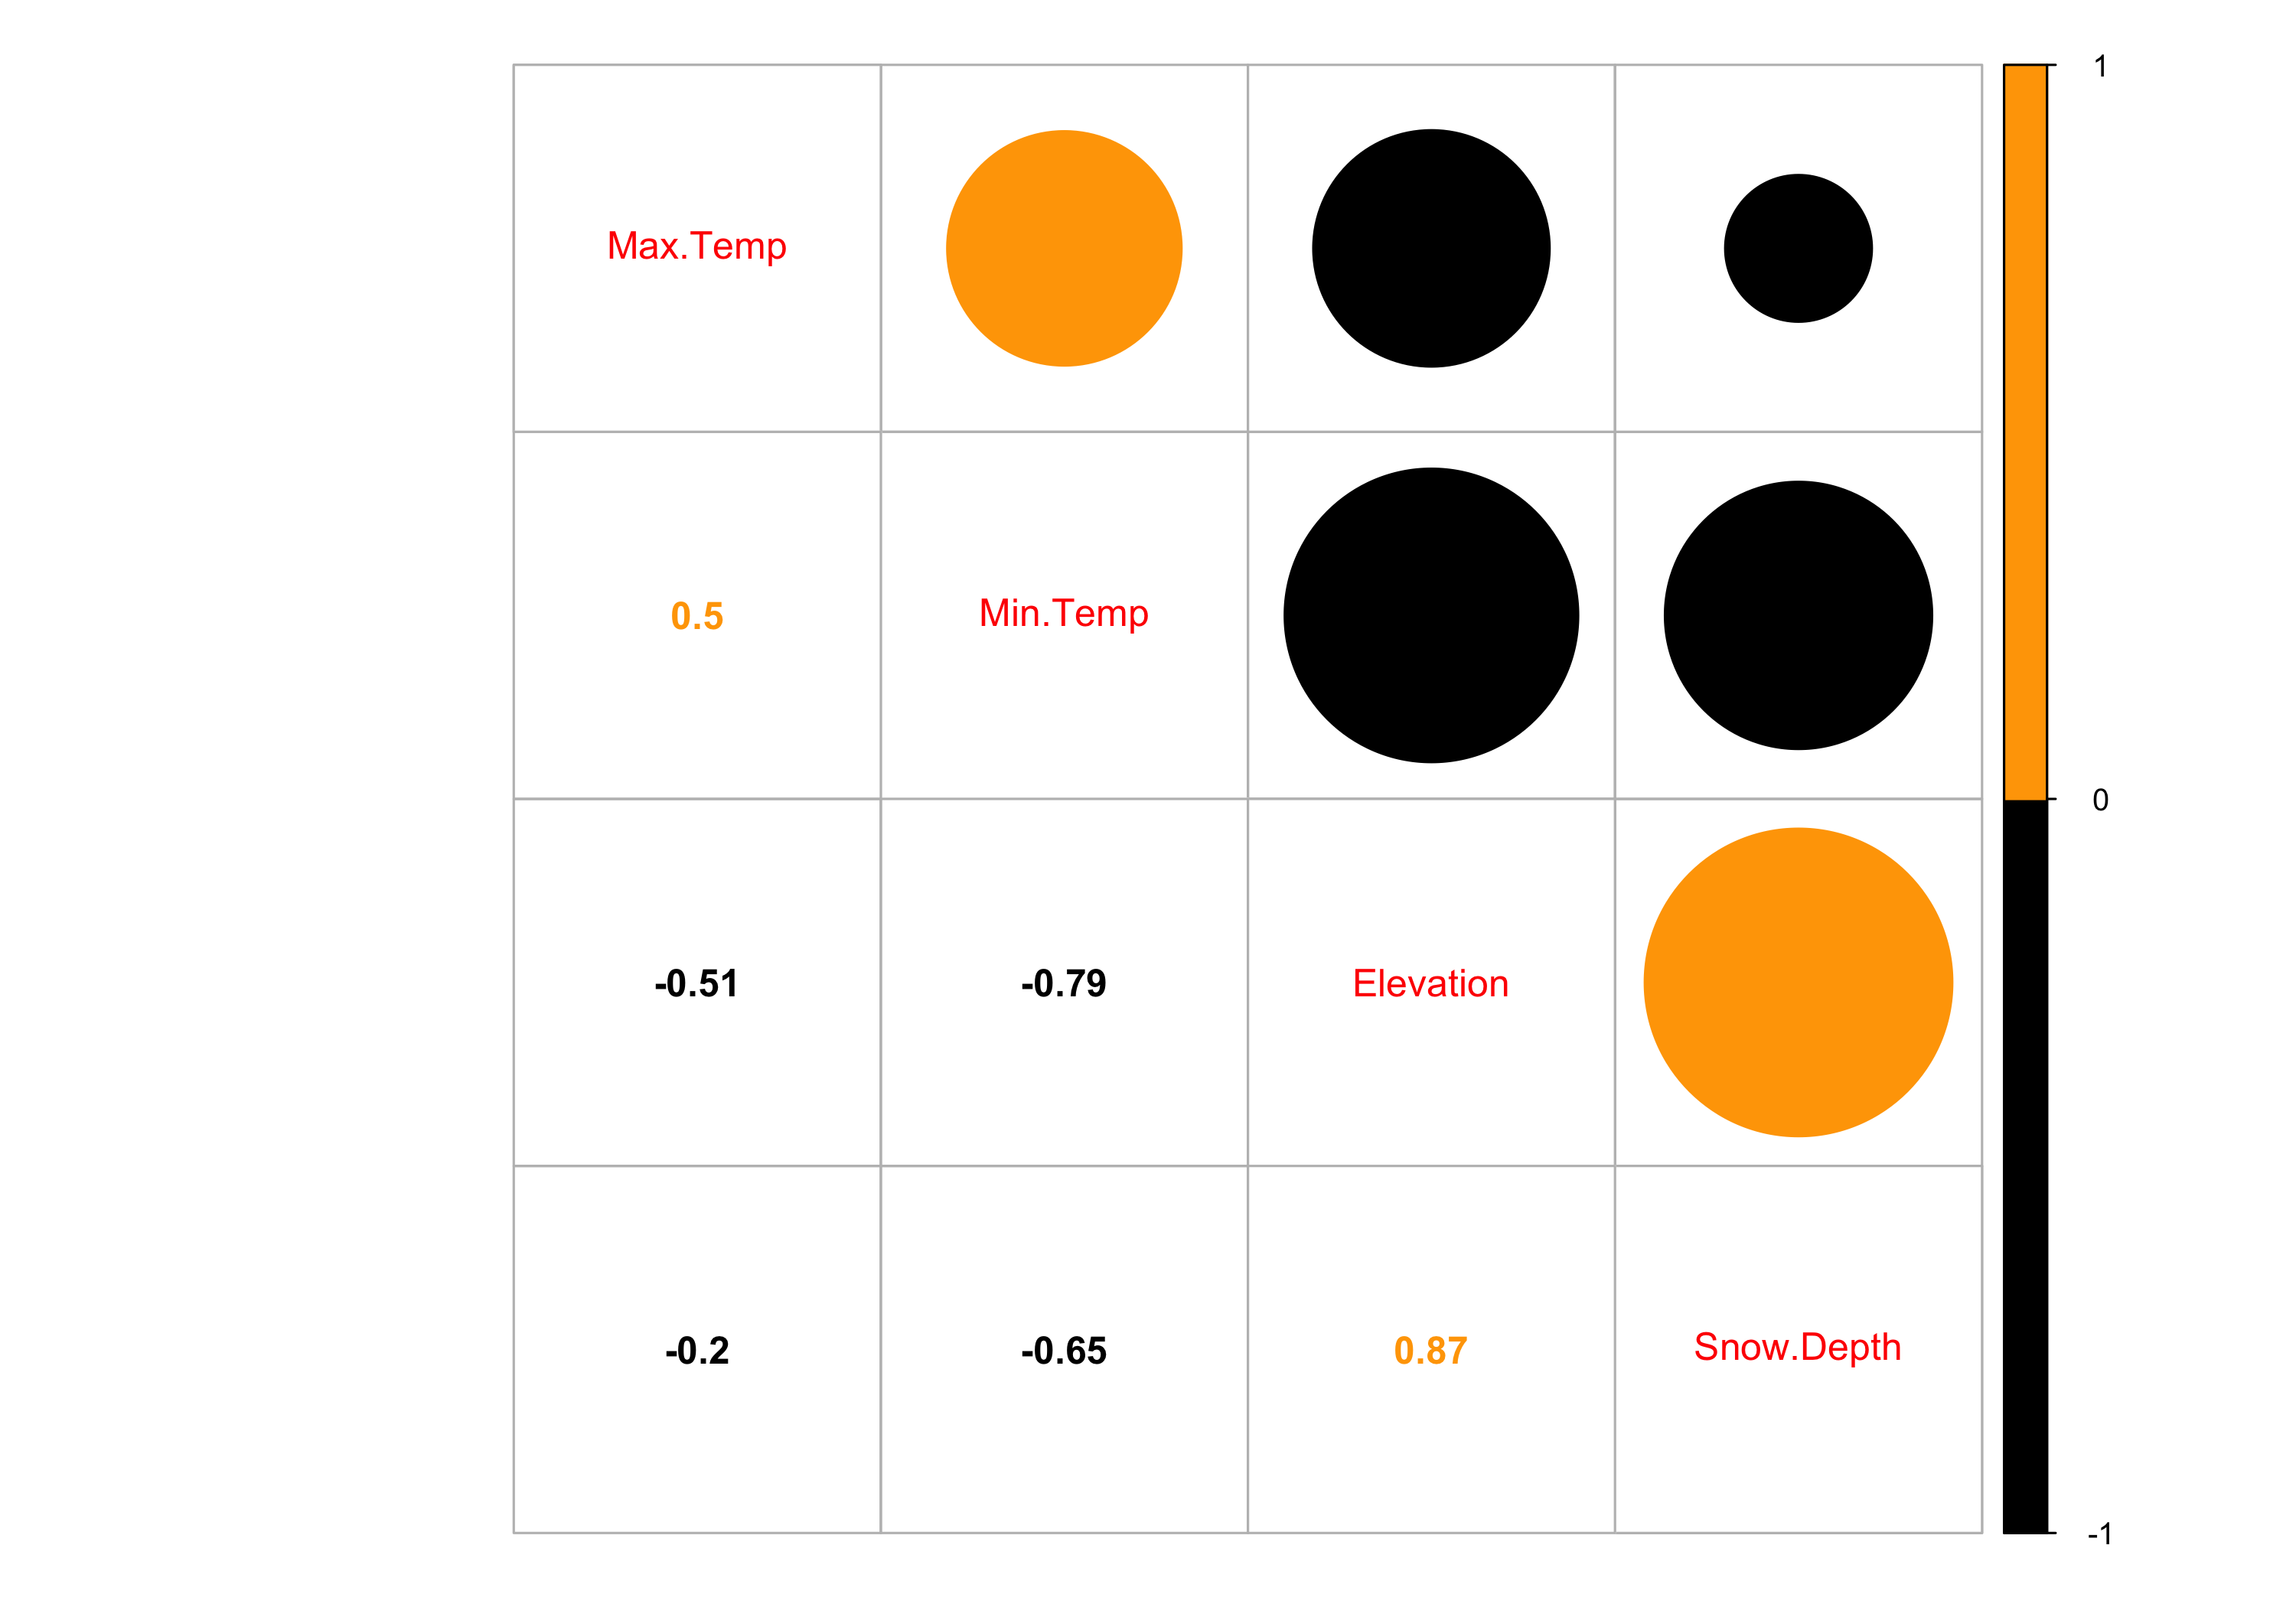

In [64]:
par(mfrow=c(1,1), oma=c(0,0,1,0))
corrplot.mixed(cor(snotel3[,-c(1:2)]), upper.col=c(1, "orange"),
               lower.col=c(1, "orange"))

In [65]:
m_highEle <- lm(Snow.Depth~Elevation+Min.Temp+Max.Temp, data=snotel3)
summary(m_highEle)


Call:
lm(formula = Snow.Depth ~ Elevation + Min.Temp + Max.Temp, data = snotel3)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6746 -3.1156 -0.1787  2.4330 13.6441 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.736e+02  8.851e+01  -1.961  0.09068 . 
Elevation    2.714e-02  6.832e-03   3.972  0.00538 **
Min.Temp    -7.417e-02  1.735e+00  -0.043  0.96709   
Max.Temp     1.015e+00  5.592e-01   1.815  0.11242   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.315 on 7 degrees of freedom
Multiple R-squared:  0.8311,	Adjusted R-squared:  0.7587 
F-statistic: 11.48 on 3 and 7 DF,  p-value: 0.0043


Compared to the full elevation plot, the adjusted R-sq is much smaller.